# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user
# Imblearn libary is used to handle imbalanced data

# Jupyter notebook
!pip install imblearn --user

!pip install imbalanced-learn --user

# Anaconda prompt
#!pip install -U imbalanced-learn

#conda install -c conda-forge imbalanced-learn

# Restart the kernel after successful installation of the library

In [2]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Project 3/BankChurners.csv")
data = df.copy()

In [5]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [6]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [7]:
data.shape

(10127, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are a total of 21 columns and 10127 observations in the dataset
* We can see that 2 columns have less than 10127 non-null values i.e. columns have missing values.
* There are 6 columns as Object type which need to be changed into categorical.
* The other 15 columns are identified as numeric columns.

In [9]:
#Converting the objects into categorical columns
data['Attrition_Flag'] = pd.Categorical(data['Attrition_Flag'])
data['Gender'] = pd.Categorical(data['Gender'])
data['Education_Level'] = pd.Categorical(data['Education_Level'])
data['Marital_Status'] = pd.Categorical(data['Marital_Status'])
data['Income_Category'] = pd.Categorical(data['Income_Category'])
data['Card_Category'] = pd.Categorical(data['Card_Category'])

In [10]:
data.duplicated().sum()

0

* There are no duplicated observations.

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


* The minimum customer age is 26 years old and maximum is 73.
* Mean value for the customer age column is approx 46 and the median is also 46. This shows that majority of the customers are under 50 years of age.
* The average number of dependant is 2.
* The minimum credit limit is $1438.
* The maximum relationship with the bank is 56 months maximum
* The average Total transaction amount (Total_Trans_Amt) in the last 12 months is 4404 dollars.


In [12]:
data.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [13]:
data["Education_Level"].value_counts()

Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [14]:
data["Marital_Status"].value_counts()

Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64

* 2 columns have missing values Education level and martial status.

In [15]:
data["Income_Category"].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64

In [16]:
# let's check for missing values in the data based on their percentage
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

* Education_Level column has 15% missing values out of the total observations.
* Marital_Status column has 7.4% missing values out of the total observations.
We will impute these values after splitting the data into train,validation and test sets.

In [17]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

* Customer_Age has only 45 unique values i.e. most of the customers are of similar age.
* We have 10 continuous variables such as Age, Months_on_book, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1 and Avg_Utilization_Ratio.
All other variables are categorical.

In [18]:
# list of all categorical variables
cat_col = data.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

CLIENTNUM
768805383   0.000
711784908   0.000
720133908   0.000
803197833   0.000
812222208   0.000
             ... 
796903083   0.000
716014983   0.000
712521783   0.000
780045708   0.000
714337233   0.000
Name: proportion, Length: 10127, dtype: float64
--------------------------------------------------
Attrition_Flag
Existing Customer   0.839
Attrited Customer   0.161
Name: proportion, dtype: float64
--------------------------------------------------
Customer_Age
44   0.049
49   0.049
46   0.048
45   0.048
47   0.047
43   0.047
48   0.047
50   0.045
42   0.042
51   0.039
53   0.038
41   0.037
52   0.037
40   0.036
39   0.033
54   0.030
38   0.030
55   0.028
56   0.026
37   0.026
57   0.022
36   0.022
35   0.018
59   0.016
58   0.016
34   0.014
33   0.013
60   0.013
32   0.010
65   0.010
61   0.009
62   0.009
31   0.009
26   0.008
30   0.007
63   0.006
29   0.006
64   0.004
27   0.003
28   0.003
67   0.000
66   0.000
68   0.000
70   0.000
73   0.000
Name: proportion, dtype: float64
-

In [19]:
# CLIENTNUM is unique for each candidate and might not add value to modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

## Data Overview

- Observations
- Sanity checks

In [20]:
data["Income_Category"].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64

* "abc" need to impute as abc doesnot carry any weight in that column

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



## <a name='link2'>Exploratory Data Analysis (EDA) Answers</a>

1. The distribution of total transaction amounts is highly skewed to the right. Both closed accounts and existing customers exhibit outliers; however, existing customers tend to have higher transaction amounts compared to attrited customers. Attrited customers typically have a total transaction amount of around $2500, while existing customers have double that amount.

2. Approximately 20% of customers across all education levels have closed their accounts. The largest group of customers, comprising around 3200 individuals, holds graduate degrees. Furthermore, in descending order, the distribution of customers by education level is as follows: High school, Uneducated, College, Post Graduate, and finally, Doctorate.

3. Approximately 20% of customers across all income categories have closed their accounts. Among these categories, approximately 3500 customers earn less than 40K annually. Following a descending order, the income categories are as follows: 40K-60K, 80K-120K, 60K-80K, and 120K+. Additionally, there is another category labeled 'abc' that requires further investigation.

4. The "Total_Ct_Chng_Q4_Q1" refers to the change in transaction count from the fourth quarter (Q4) to the first quarter (Q1) of a given period to assess the growth or decline in customer transactions over the specified time frame. This metric can provide insights into customer engagement and activity levels over time. A higher value indicates a significant increase in transaction activity, while a lower value suggests less change or even a decrease in transaction frequency. Both the distribution graphs for existing customers and attrited customers exhibit a pronounced right skew. Outliers are present in both customer categories. Existing customers demonstrate higher transaction activity compared to attrited customers.

5. Outliers are present within the distribution of inactivity among attrited customers over the last 12 months. While both existing and attrited customers mostly exhibit 3 months of inactivity within the last year, the higher count of existing customers results in a greater total than attrited customers. This aspect warrants further investigation to mitigate inactivity among existing customers.

6. The Average Open-to-Buy Credit Line over the last 12 months (`Avg_Open_To_Buy`) exhibits a strong positive correlation with the `credit limit` suggests that customers with higher credit limits tend to have higher open-to-buy credit lines. The Total Revolving Balance on the Credit Card (`Total_Revolving_Bal`) and the Average Card Utilization Ratio (`Avg_Utilization_Ratio`) show a positive correlation indicating customers with higher revolving balances tend to have higher average card utilization ratios. The Period of Relationship with the Bank (in months) (`Months_on_book`) demonstrates a strong correlation with `customer age` suggests that older customers tend to have longer relationships with the bank. Additionally, Total Transaction Amount over the Last 12 months (`Total_Trans_Amt`) and Total Transaction Count (`Total_Trans_Ct`) over the Last 12 months exhibit a strong correlation implies that customers who engage in more transactions also tend to have higher transaction amounts.





#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [23]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [24]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

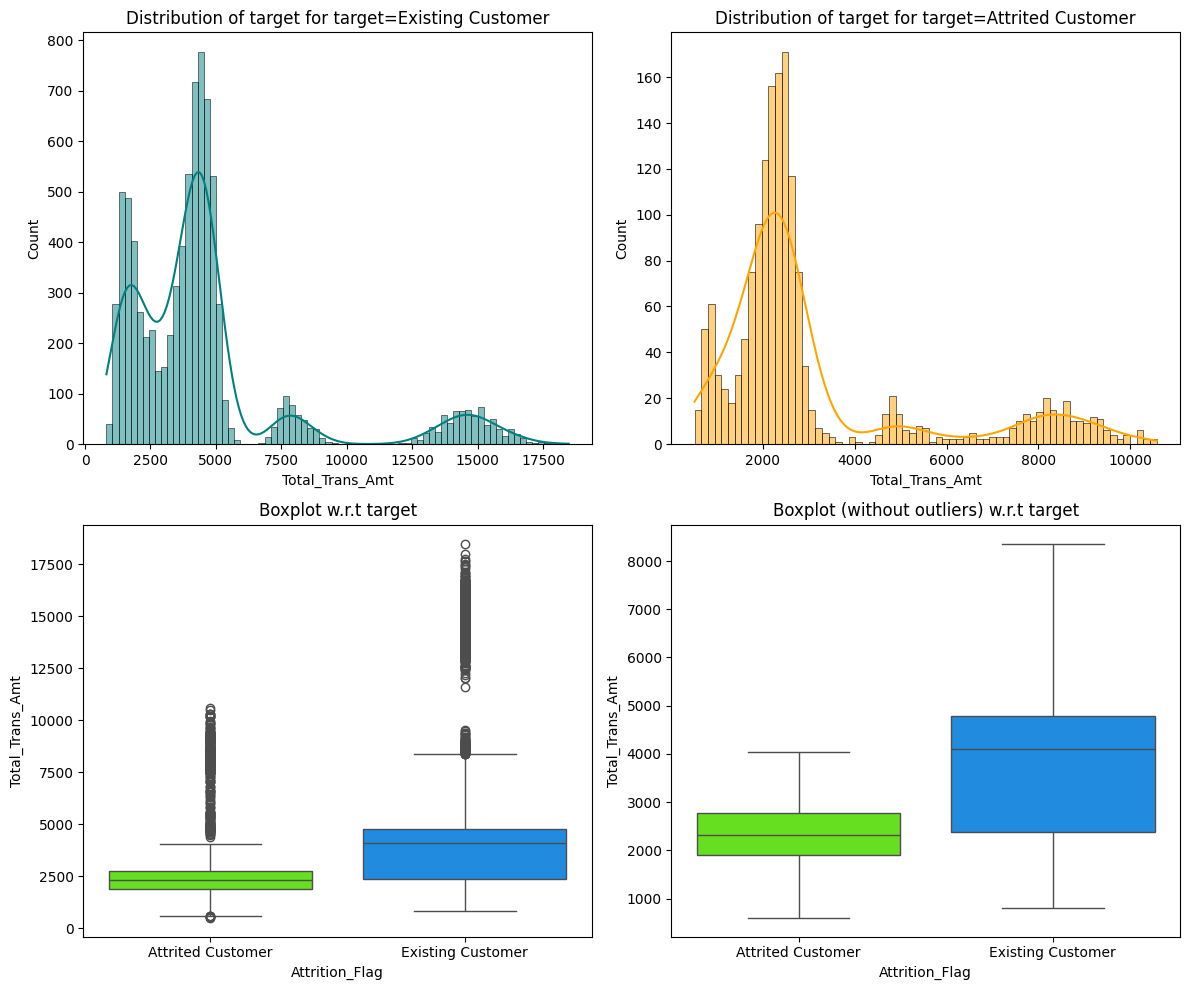

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

* There's a difference between the attrited customers and Existing customer in total transaction amount in their last 12 months. Existing customer have higher amount transaction than Attrited customers.
* Both distribution graphs for existing and attrited customers show skewness to the right.

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


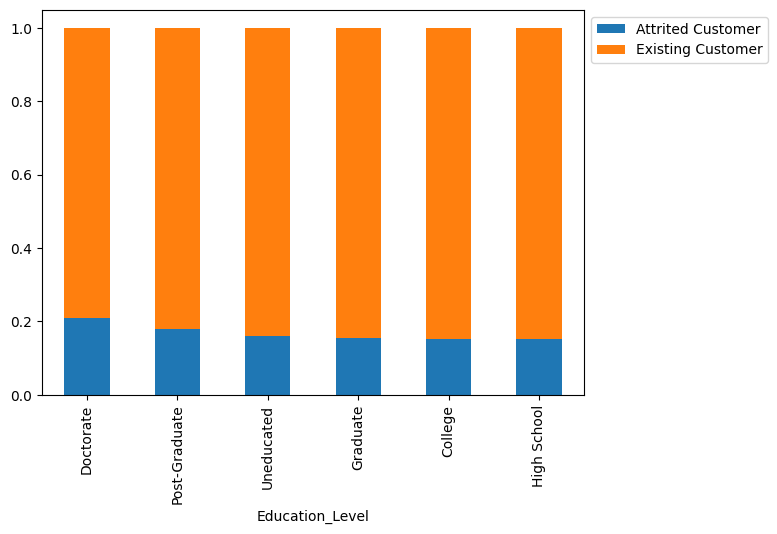

In [ ]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

* ~20% of the customers in all the education levels have closed their accounts.

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


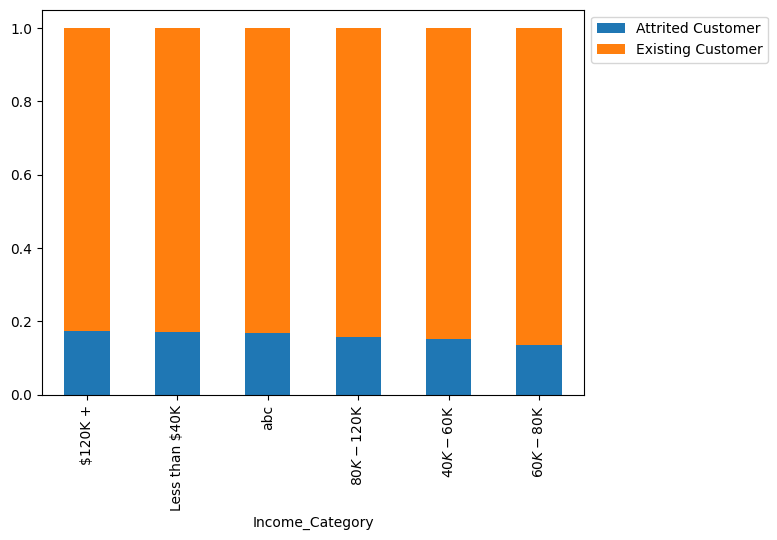

In [ ]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

* ~20% of the customers in all the Income categories have closed their accounts.
* The category abc needs to be impute and consider as missing data.

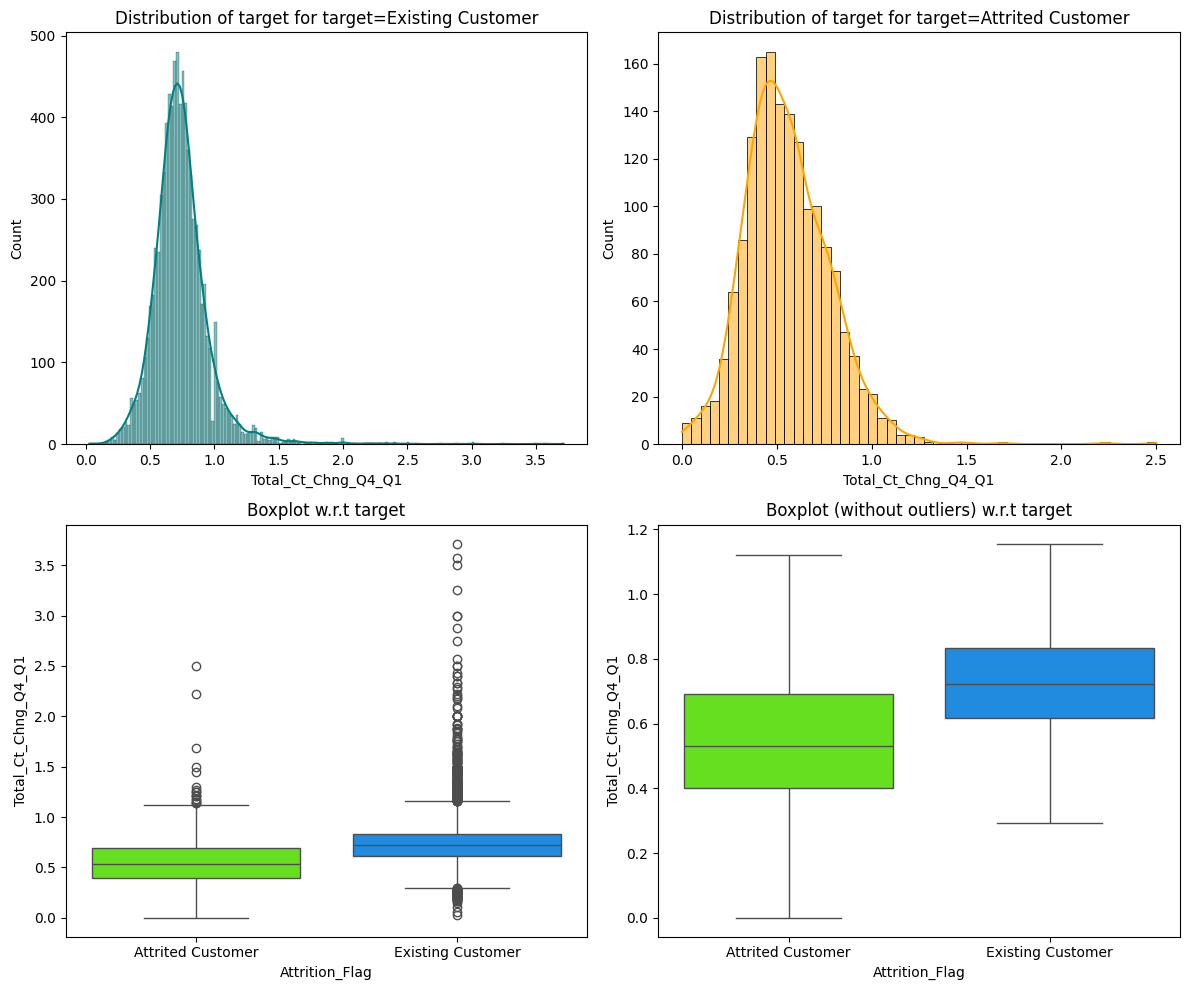

In [ ]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

* The "Total_Ct_Chng_Q4_Q1" refers to the change in transaction count from the fourth quarter (Q4) to the first quarter (Q1) of a given period to assess the growth or decline in customer transactions over the specified time frame.
* Both the distribution graphs for existing customers and attrited customers exhibit a pronounced right skew. Outliers are present in both customer categories. Existing customers demonstrate higher transaction activity compared to attrited customers.



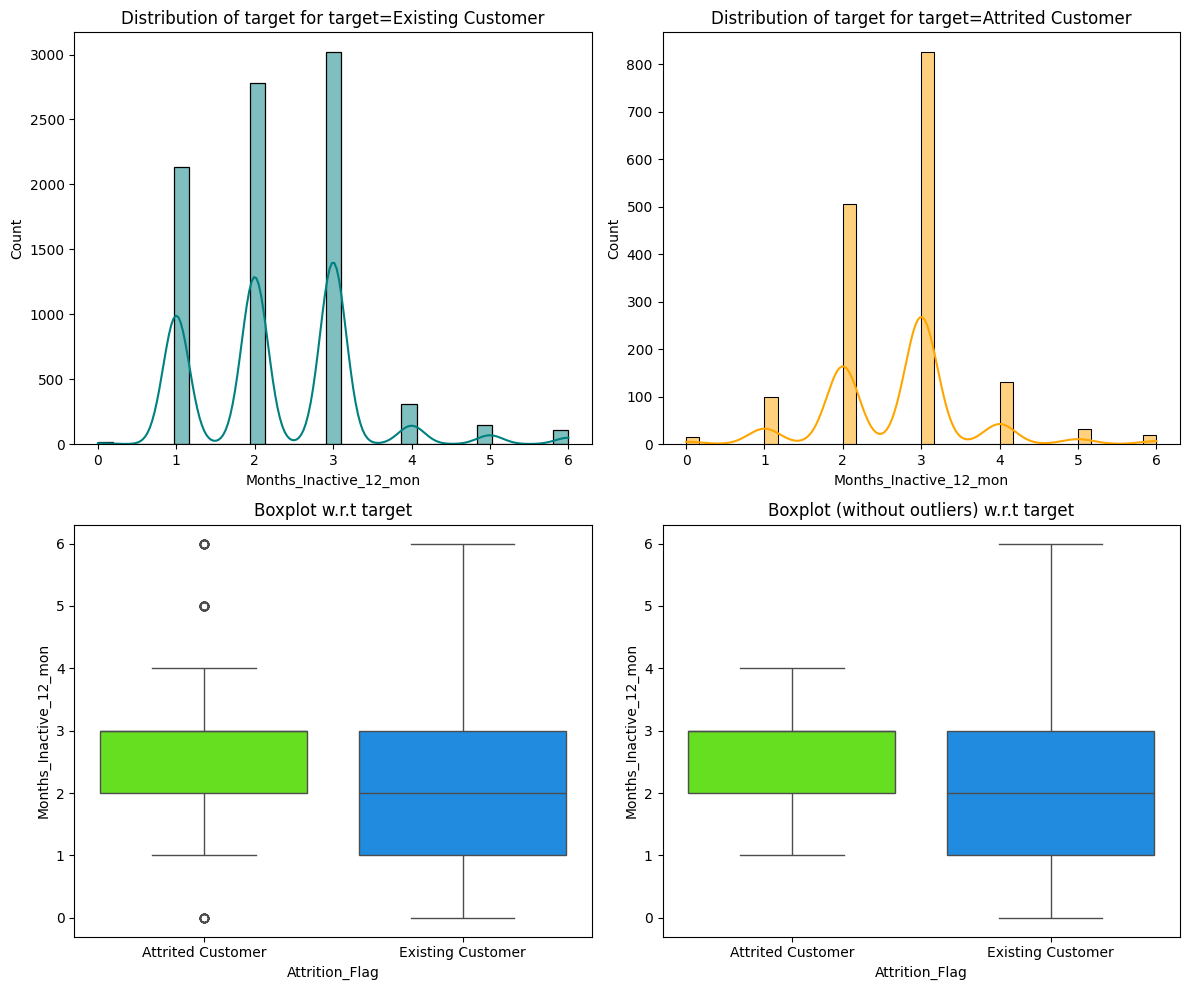

In [ ]:
distribution_plot_wrt_target(data, "Months_Inactive_12_mon", "Attrition_Flag")

* Outliers are present within the distribution of inactivity among attrited customers over the last 12 months.
* While both existing and attrited customers mostly exhibit 3 months of inactivity within the last year, the higher count of existing customers results in a greater total than attrited customers.
* The maximum duration of inactivity among customers in both categories is six months.

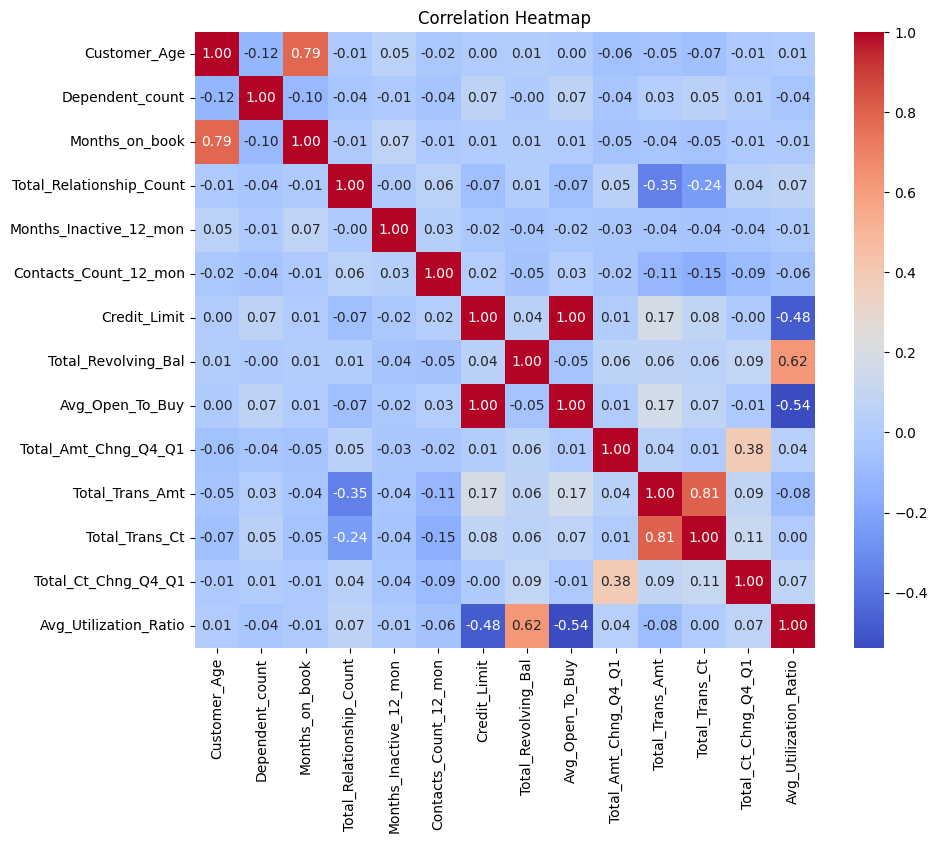

In [ ]:
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numeric_columns.corr()

# Displaying the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

* The Average Open-to-Buy Credit Line over the last 12 months (`Avg_Open_To_Buy`) exhibits a strong positive correlation with the `credit limit`.
* The Total Revolving Balance on the Credit Card (`Total_Revolving_Bal`) and the Average Card Utilization Ratio (`Avg_Utilization_Ratio`) show a positive correlation.
* The Period of Relationship with the Bank (in months) (`Months_on_book`) demonstrates a strong correlation with `customer age`.
* Additionally, Total Transaction Amount over the Last 12 months (`Total_Trans_Amt`) and Total Transaction Count (`Total_Trans_Ct`) over the Last 12 months exhibit a strong correlation.

## Data Pre-processing

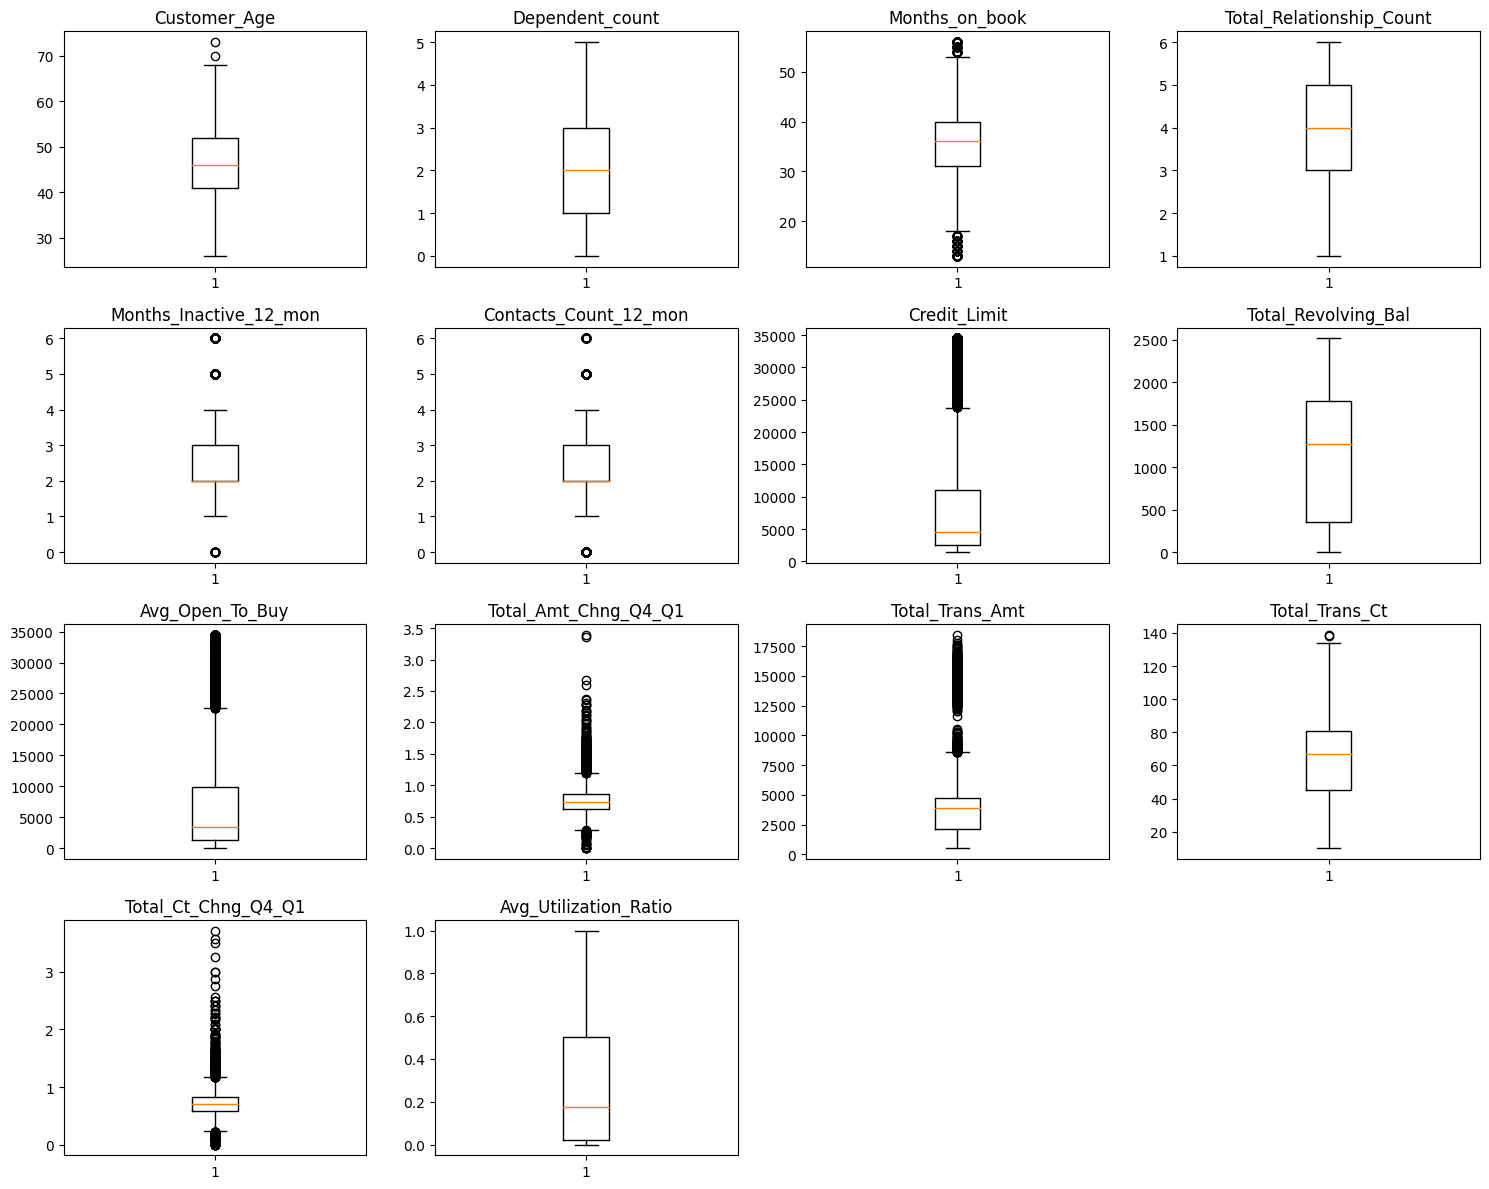

In [25]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite a numerous outliers in the data.
* However, we will not treat them as they are proper values.

## Data Preparation for Modeling




In [26]:
X = data.drop(["Attrition_Flag"], axis=1)
y = data["Attrition_Flag"].apply(lambda x: 1 if x == "Existing Customer" else 0)

In [27]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [28]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


## Missing value imputation


In [29]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [30]:
cat_cols = list(X_train.select_dtypes(include='category').columns)
# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

In [31]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.

In [32]:
# Replacing "abc" with the mode of the Income_Category column in each split
mode_income = X_train['Income_Category'].mode()[0]
X_train['Income_Category'] = X_train['Income_Category'].replace('abc', mode_income)

mode_income = X_val['Income_Category'].mode()[0]
X_val['Income_Category'] = X_val['Income_Category'].replace('abc', mode_income)

mode_income = X_test['Income_Category'].mode()[0]
X_test['Income_Category'] = X_test['Income_Category'].replace('abc', mode_income)

In [33]:
#Verifying the changes
X_train["Income_Category"].value_counts()

Income_Category
Less than $40K    2798
$40K - $60K       1076
$80K - $120K       918
$60K - $80K        847
$120K +            436
Name: count, dtype: int64

## Creating Dummy Variables

In [34]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


In [35]:
# Convert boolean dummy variables to numerical values (0 or 1)
X_train = X_train.astype(int)
X_val = X_val.astype(int)
X_test = X_test.astype(int)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


In [36]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9501,47,2,37,1,2,2,21714,1969,19745,0,13270,104,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5065,49,4,42,5,1,4,7789,957,6832,0,3412,70,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2375,53,2,36,6,1,3,3176,1470,1706,0,1634,53,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
7579,56,2,45,3,3,1,3296,1435,1861,0,4327,66,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2776,47,4,36,3,3,3,17557,0,17557,0,2142,62,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [37]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [38]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9982349480290253
Random forest: 1.0
GBM: 0.9894096881741518
Adaboost: 0.9790154932339674
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.9770588235294118
Random forest: 0.9876470588235294
GBM: 0.9858823529411764
Adaboost: 0.9776470588235294
dtree: 0.9670588235294117
XGBoost: 0.9835294117647059


* The models have relatively high Recall scores on the training data, with Random Forest and Bagging having perfect scores (1.0). This suggests that these models have learned the training data very well, but it also raises concerns about potential overfitting, as they might not generalize well to unseen data.
In addition, on the validation data, the Performance scores are generally lower for all models. This indicates that the models may not perform as well on new, unseen data, and there might be some degree of overfitting.

* Among the models, GBM & Adaboost stands out as having a good reasonable Recall score on the validation data (0.985) & (0.977), which suggests it might be the best model for this particular task. Another key factor to consider is the difference between training performance and validation performance, which helps assess whether the model generalizes well.

* The choice of the best model may also depend on other factors such as computational resources, training time, and interpretability. Bagging is a strong candidate based on Recall, but other factors should be considered in the model selection process.

In [39]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9982, Validation Score: 0.9771, Difference: 0.0212
Random forest: Training Score: 1.0000, Validation Score: 0.9876, Difference: 0.0124
GBM: Training Score: 0.9894, Validation Score: 0.9859, Difference: 0.0035
Adaboost: Training Score: 0.9790, Validation Score: 0.9776, Difference: 0.0014
dtree: Training Score: 1.0000, Validation Score: 0.9671, Difference: 0.0329
XGBoost: Training Score: 1.0000, Validation Score: 0.9835, Difference: 0.0165


### Model Building with Oversampled data


In [40]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 5099
Before Oversampling, counts of label 'No': 976 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



In [41]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9956854285153952
Random forest: 1.0
GBM: 0.9707785840360855
Adaboost: 0.9570504020396157
dtree: 1.0
XGBoost: 0.9998038831143361

Validation Performance:

Bagging: 0.95
Random forest: 0.971764705882353
GBM: 0.9676470588235294
Adaboost: 0.9523529411764706
dtree: 0.9429411764705883
XGBoost: 0.9782352941176471


## Observation

* When compared to the previous set of scores without oversampling, the models show improved generalization performance on the validation data. Recall scores on the validation data are now closer to the training data scores, indicating that oversampling has helped the models generalize better.

* Random forest and decision tree models show perfect recall scores on the training data, indicating they are likely overfitting.

* Bagging also exhibits high recall on the training set but performs slightly worse on the validation set, suggesting some overfitting.

* Gradient Boosting (GBM) and Adaboost models have relatively high recall scores on both training and validation sets, indicating good generalization ability.

* Overall, while all models perform well on the training data, their performance on the validation set varies, with some showing signs of overfitting.



In [42]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9957, Validation Score: 0.9500, Difference: 0.0457
Random forest: Training Score: 1.0000, Validation Score: 0.9718, Difference: 0.0282
GBM: Training Score: 0.9708, Validation Score: 0.9676, Difference: 0.0031
Adaboost: Training Score: 0.9571, Validation Score: 0.9524, Difference: 0.0047
dtree: Training Score: 1.0000, Validation Score: 0.9429, Difference: 0.0571
XGBoost: Training Score: 0.9998, Validation Score: 0.9782, Difference: 0.0216


### Model Building with Undersampled data

In [43]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [44]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 5099
Before Under Sampling, counts of label 'No': 976 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



In [45]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9918032786885246
Random forest: 1.0
GBM: 0.9590163934426229
Adaboost: 0.9262295081967213
dtree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.9141176470588235
Random forest: 0.9305882352941176
GBM: 0.941764705882353
Adaboost: 0.9211764705882353
dtree: 0.8976470588235295
XGBoost: 0.9476470588235294


## Observaion

* Random forest and decision tree models exhibit perfect recall scores on the training data, suggesting potential overfitting.

* Bagging, Random forest, and GBM models demonstrate relatively high recall scores on both the training and validation sets, indicating good generalization ability.

* Adaboost shows a very small decline in recall score from the training to the validation set, this may be an indication of an issue with generalization. Hyperparameter tuning can help improve the model's generalization performance.

* Overall, while some models perform well on both the training and validation sets, others show signs of overfitting or challenges with generalization.

In [46]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9918, Validation Score: 0.9141, Difference: 0.0777
Random forest: Training Score: 1.0000, Validation Score: 0.9306, Difference: 0.0694
GBM: Training Score: 0.9590, Validation Score: 0.9418, Difference: 0.0173
Adaboost: Training Score: 0.9262, Validation Score: 0.9212, Difference: 0.0051
dtree: Training Score: 1.0000, Validation Score: 0.8976, Difference: 0.1024
XGBoost: Training Score: 1.0000, Validation Score: 0.9476, Difference: 0.0524


### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Tuning AdaBoosting with original data

In [47]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9878404433412227:


In [48]:
tuned_ada = AdaBoostClassifier(
    random_state=1,
    n_estimators=50,
    learning_rate=0.1,
    base_estimator= DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

In [49]:
# Checking model's performance on training set
ada_train = model_performance_classification_sklearn(tuned_ada, X_train, y_train)
ada_train

,Accuracy,Recall,Precision,F1
0,0.943,0.987,0.947,0.966


In [50]:
# Checking model's performance on validation set
ada_val = model_performance_classification_sklearn(tuned_ada, X_val, y_val)
ada_val

,Accuracy,Recall,Precision,F1
0,0.934,0.991,0.935,0.962


#### Tuning GBM with original data

In [51]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
              "n_estimators": np.arange(50,110,25),
              "learning_rate": [0.01,0.1,0.05],
              "subsample":[0.7,0.9],
              "max_features":[0.5,0.7,1],}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 50, 'max_features': 1, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=1.0:


In [52]:
tuned_gbm = GradientBoostingClassifier(
    random_state=1,
    learning_rate=0.05,
    n_estimators=50,
    subsample=0.7,
    max_features=1,
    init= AdaBoostClassifier(random_state=1)
)
tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=1, n_estimators=50,
                           random_state=1, subsample=0.7)

In [53]:
# Checking model's performance on training set
gbm_train = model_performance_classification_sklearn(tuned_gbm, X_train, y_train)
gbm_train

,Accuracy,Recall,Precision,F1
0,0.846,1.000,0.845,0.916


In [54]:
# Checking model's performance on validation set
gbm_val = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_val

,Accuracy,Recall,Precision,F1
0,0.844,1.000,0.843,0.915


#### Tuning AdaBoosting with oversampled data

In [55]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9705795762858628:


In [56]:
tuned_ada_over = AdaBoostClassifier(
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_ada_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [57]:
# Checking model's performance on training set
ada_over_train = model_performance_classification_sklearn(tuned_ada_over, X_train_over, y_train_over)
ada_over_train

,Accuracy,Recall,Precision,F1
0,0.982,0.978,0.986,0.982


In [58]:
# Checking model's performance on validation set
ada_over_val = model_performance_classification_sklearn(tuned_ada_over, X_val, y_val)
ada_over_val

,Accuracy,Recall,Precision,F1
0,0.957,0.972,0.977,0.974


#### Tuning GBM with oversampled data

In [59]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
              "n_estimators": np.arange(50,110,25),
              "learning_rate": [0.01,0.1,0.05],
              "subsample":[0.7,0.9],
              "max_features":[0.5,0.7,1],}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.9409653832092209:


In [60]:
tuned_gbm_over = GradientBoostingClassifier(
    random_state=1,
    learning_rate=0.05,
    n_estimators=100,
    subsample=0.7,
    max_features=0.7,
    init=DecisionTreeClassifier(random_state=1)
)
tuned_gbm_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [61]:
# Checking model's performance on training set
gbm_over_train = model_performance_classification_sklearn(tuned_gbm_over, X_train_over, y_train_over)
gbm_over_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [62]:
# Checking model's performance on validation set
gbm_over_val = model_performance_classification_sklearn(tuned_gbm_over, X_val, y_val)
gbm_over_val

,Accuracy,Recall,Precision,F1
0,0.918,0.943,0.959,0.951


#### Tuning AdaBoosting with undersampled data

In [63]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 75, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9067451596023025:


In [64]:
tuned_ada_under = AdaBoostClassifier(
    random_state=1,
    learning_rate=0.1,
    n_estimators=75,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_ada_under.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=75, random_state=1)

In [65]:
# Checking model's performance on training set
ada_under_train = model_performance_classification_sklearn(tuned_ada_under, X_train_un, y_train_un)
ada_under_train

,Accuracy,Recall,Precision,F1
0,0.969,0.961,0.977,0.969


In [66]:
# Checking model's performance on validation set
ada_under_val = model_performance_classification_sklearn(tuned_ada_under, X_val, y_val)
ada_under_val

,Accuracy,Recall,Precision,F1
0,0.944,0.946,0.987,0.966


#### Tuning GBM with undersampled data

In [67]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
              "n_estimators": np.arange(50,110,25),
              "learning_rate": [0.01,0.1,0.05],
              "subsample":[0.7,0.9],
              "max_features":[0.5,0.7,1],}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.8831763474620618:


In [68]:
tuned_gbm_under = GradientBoostingClassifier(
    random_state=1,
    learning_rate=0.05,
    n_estimators=100,
    subsample=0.7,
    max_features=0.7,
    init=DecisionTreeClassifier(random_state=1)
)
tuned_gbm_under.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [69]:
# Checking model's performance on training set
gbm_under_train = model_performance_classification_sklearn(tuned_gbm_under, X_train_un, y_train_un)
gbm_under_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [70]:
# Checking model's performance on validation set
gbm_under_val = model_performance_classification_sklearn(tuned_gbm_under, X_val, y_val)
gbm_under_val

,Accuracy,Recall,Precision,F1
0,0.886,0.898,0.965,0.930


## Model Comparison and Final Model Selection

In [71]:
# training performance comparison
models_train_comp_data = pd.concat(
    [
        ada_train.T,
        gbm_train.T,
        ada_over_train.T,
        gbm_over_train.T,
        ada_under_train.T,
        gbm_under_train.T,
    ],
    axis=1,
)

# Fixing column names
models_train_comp_data.columns = [
    "Ada Bossting trained with original data",
    "Gradient boosting trained with original data",
    "Ada Boosting trained with Oversampled data",
    "Gradient boosting trained with Oversampled data",
    "Ada Boosting trained with Undersampled data",
    "Gradient boosting trained with Undersampled data",
]

# Printing the comparison dataframe
print("Training performance comparison:")
models_train_comp_data

Training performance comparison:


,Ada Bossting trained with original data,Gradient boosting trained with original data,Ada Boosting trained with Oversampled data,Gradient boosting trained with Oversampled data,Ada Boosting trained with Undersampled data,Gradient boosting trained with Undersampled data
Accuracy,0.943,0.846,0.982,1.000,0.969,1.000
Recall,0.987,1.000,0.978,1.000,0.961,1.000
Precision,0.947,0.845,0.986,1.000,0.977,1.000
F1,0.966,0.916,0.982,1.000,0.969,1.000


In [72]:
# Validation performance comparison
models_train_comp_data = pd.concat(
    [
        ada_val.T,
        gbm_val.T,
        ada_over_val.T,
        gbm_over_val.T,
        ada_under_val.T,
        gbm_under_val.T,
    ],
    axis=1,
)

# Fixing column names
models_train_comp_data.columns = [
    "Ada Boosting trained with original data",
    "Gradient boosting trained with original data",
    "Ada Boosting trained with Oversampled data",
    "Gradient boosting trained with Oversampled data",
    "Ada Boosting trained with Undersampled data",
    "Gradient boosting trained with Undersampled data",
]

# Printing the comparison dataframe
print("Validation performance comparison:")
models_train_comp_data

Validation performance comparison:


,Ada Boosting trained with original data,Gradient boosting trained with original data,Ada Boosting trained with Oversampled data,Gradient boosting trained with Oversampled data,Ada Boosting trained with Undersampled data,Gradient boosting trained with Undersampled data
Accuracy,0.934,0.844,0.957,0.918,0.944,0.886
Recall,0.991,1.000,0.972,0.943,0.946,0.898
Precision,0.935,0.843,0.977,0.959,0.987,0.965
F1,0.962,0.915,0.974,0.951,0.966,0.930


## Observations

* Ada Boosting trained with Oversampled data and Gradient boosting trained with Oversampled data also achieved high recall scores, with values of 0.978 and 1.0 on the training set and 0.972 and 0.943 on the validation set, respectively. This suggests that oversampling techniques effectively improved the models' ability to capture positive instances, leading to higher recall scores.

* Ada Boosting trained with Undersampled data and Gradient boosting trained with Undersampled data achieved slightly lower recall scores compared to their counterparts trained with oversampled data. However, their recall scores remained relatively high, indicating that undersampling techniques also contributed to improving the models' ability to identify positive instances.

* Overall, both Ada Boosting and Gradient boosting models exhibit strong performance in terms of recall across different training and validation scenarios. Additionally, oversampling and undersampling techniques appear to be effective in enhancing the models' ability to identify positive instances, as reflected in the higher recall scores compared to models trained with original data.

### Test set final performance

In [73]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_ada_over, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.962,0.981,0.974,0.977


## Observation

* Upon evaluating the performance of the hyperparameter-tuned AdaBoost model trained with overersampled data on the test dataset, we note an exceptional level of performance and consistency, with both recall and accuracy achieving a high score of 0.98.
*  AdaBoost trained with oversampled data exhibits excellent performance in all three sets of data: training, validation, and test, with a Recall score consistently above 0.95. Not only does AdaBoost perform well, but it also generalizes effectively, as evidenced by the small difference between the validation set and training set scores.

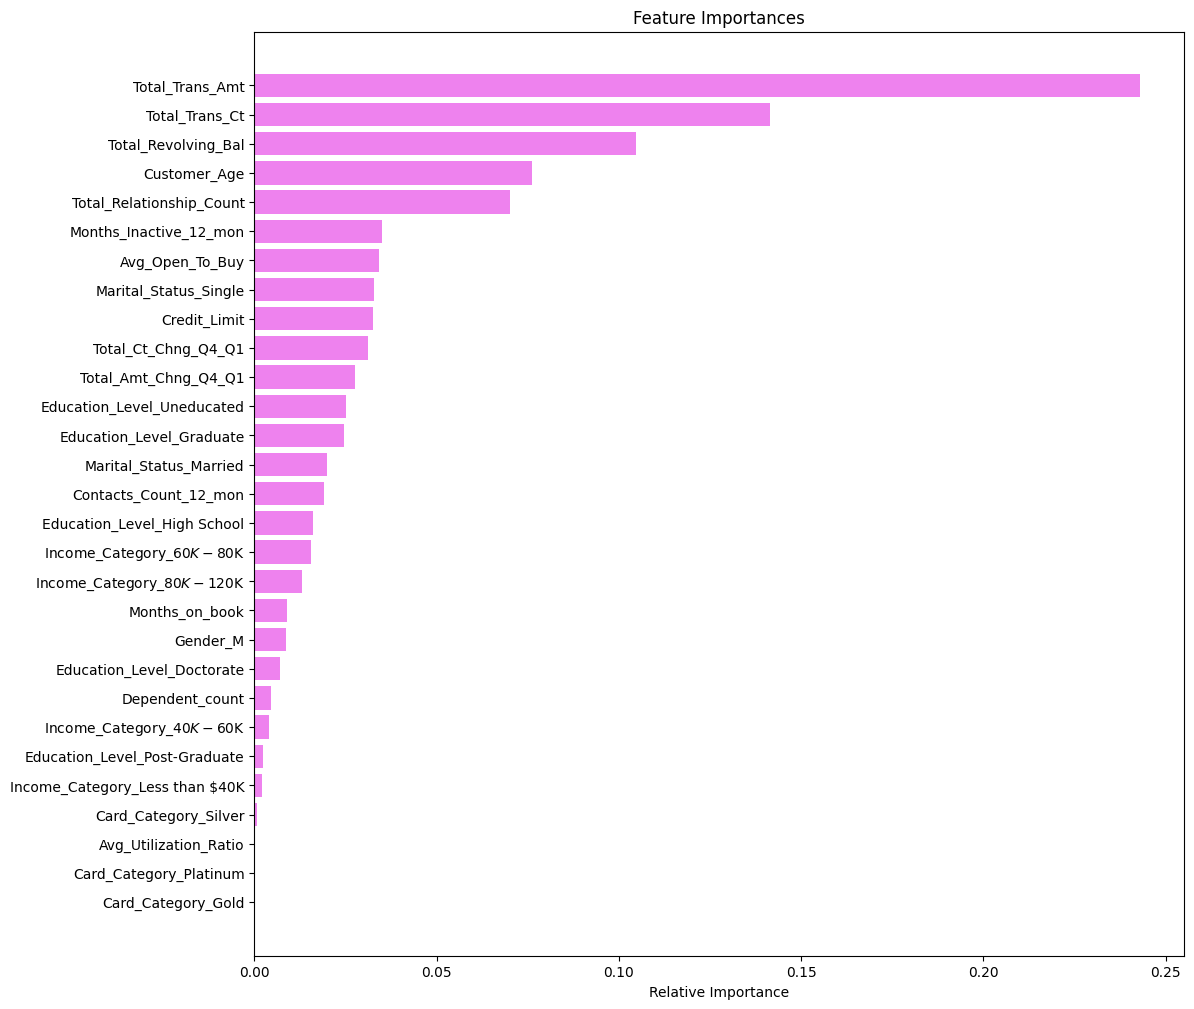

In [74]:
## Check the feature importance of the best model
feature_names = X_train.columns
importances =  tuned_ada_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Observations

* The most significant features for predicting customer credit card attrition behavior include Total Transaction Amount, Total Transaction Count, Customer Age, Total Revolving Balance and Total Relationship Count. These features exhibit a negative correlation with the Attrition Flag, indicating that lower values of these features suggest a higher likelihood of customer attrition.

# Business Insights and Conclusions

Based on a thorough analysis of the dataset provided, the following recommendations are proposed to assist Thera bank in improving its services and reducing customer credit card cancellations:

* Gender-wise Attrition: Males tend to exhibit attrition slightly less than females. The bank might want to focus more on efforts aimed at retaining female customers, like hiring more female customer service representatives.

* Education Levels and Attrition: Customers holding Graduate degrees notably demonstrate a higher attrition number, while those with uneducated category tend to exhibit lower attrition. To counter this pattern, the bank might consider implementing sophisticated banking tools designed to resonate with customers of higher educational attainment.

* Income Categories and Attrition: Examining customers across various income categories unveils that individuals earning over 120K annually possess the  attrition rate, whereas those with incomes ranging from 60K to $80K exhibit a lower attrition rate. To tackle this issue, the bank could contemplate extending higher credit limits to wealthier customers, thus aligning more closely with their financial requirements

* Customer Contact and Attrition: An interesting finding is the direct relationship between the frequency of customer interactions with the bank and the attrition rate. As the number of contacts rises, so does the probability of attrition. It's striking that customers who engaged in six contacts within the last 12 months opted to discontinue their credit card usage. To address this, the bank could improve its customer service to ensure that the majority of customer inquiries are resolved within the initial interactions.

* Product Holding and Attrition: Customers who hold multiple products are generally less inclined to attrit. The bank could introduce exclusive promotions for new products as a strategy to retain existing customers.

* Revolving Balance and Attrition: Three-quarters of existing customers typically maintain a revolving balance ranging from around 800 to 1800, whereas for attrited customers, it tends to be below 1300. The bank might consider offering interest-free incentives to customers with lower revolving balances to stimulate higher spending.

* Predictive Customer Outreach: By harnessing the predictive capabilities of the model, the bank can pinpoint customers with a high likelihood of attrition. Proactively engaging these customers and discussing credit card offers, adjustments to credit limits, and other retention strategies, the bank can strive to retain a substantial portion of these customers.

* `Key Predictive Features`: The key features for predicting customer credit card attrition behavior include Total Transaction Amount, Total Revolving Balance, Customer Age, and Total Relationship Count. It's worth noting that Total Transaction Amount and Total Transaction Count exhibit a strong positive correlation, so they can be considered as one combined feature. Therefore, there are effectively four features in total.

* `Model Comparison`: When comparing various machine learning models (Bagging, Random Forest, Gradient Boosting, AdaBoost, and Decision Tree) across original, under-sampled, and over-sampled datasets, AdaBoost emerges as the top performer. AdaBoost trained with oversampled data exhibits excellent performance in all three sets of data: training, validation, and test, with a Recall score consistently above 0.95. Not only does AdaBoost perform well, but it also generalizes effectively, as evidenced by the small difference between the validation set and training set scores.

* The following are the categorical columns with the highest number of attritions in each of them:
`Gender`: Females
`Education Level`: Graduate
`Marital Status`: Married
`Income Category`: Less than $40K
`Card Category`: Blue


***

# <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Univariate and Bivariate analysis

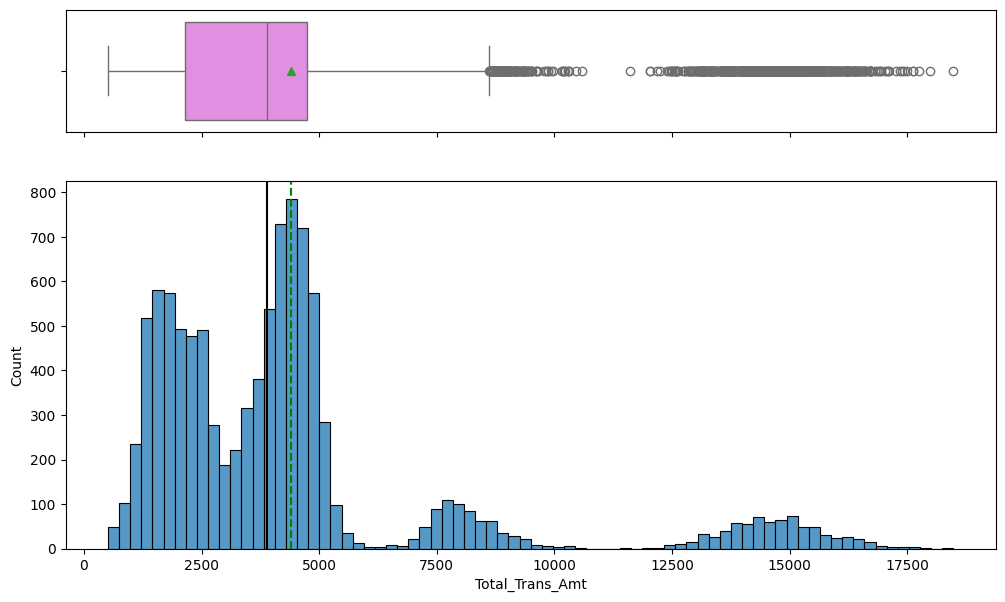

In [ ]:
histogram_boxplot(data, "Total_Trans_Amt")

* Total transaction amount is skewed to the right.
* Outliers are presented within the graph.
* The median total transaction amount is approximately $4000.

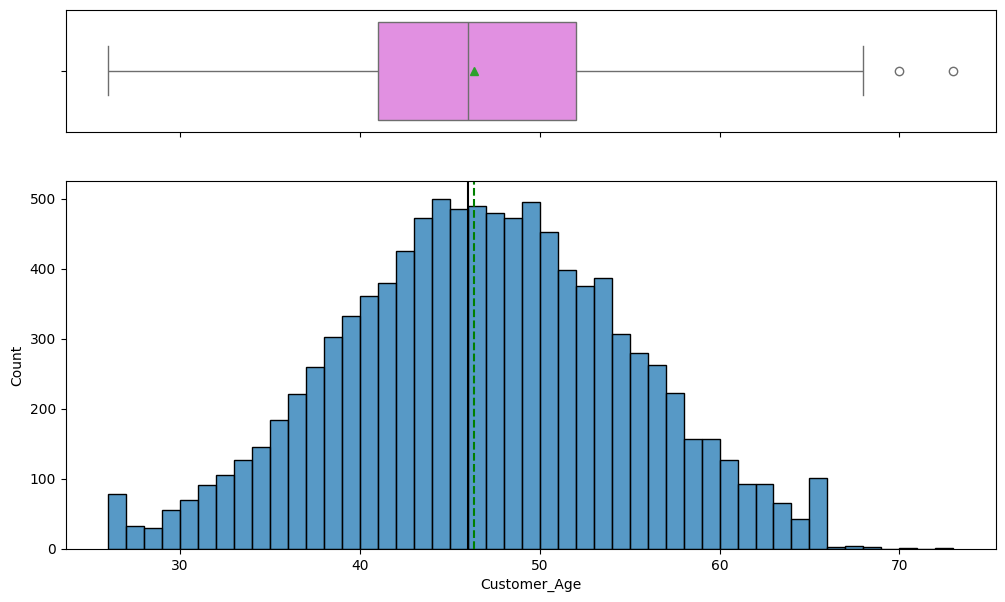

In [ ]:
histogram_boxplot(data, "Customer_Age")

* The distribution of customer age exhibits zero skewness, with the average age just above 45 years.

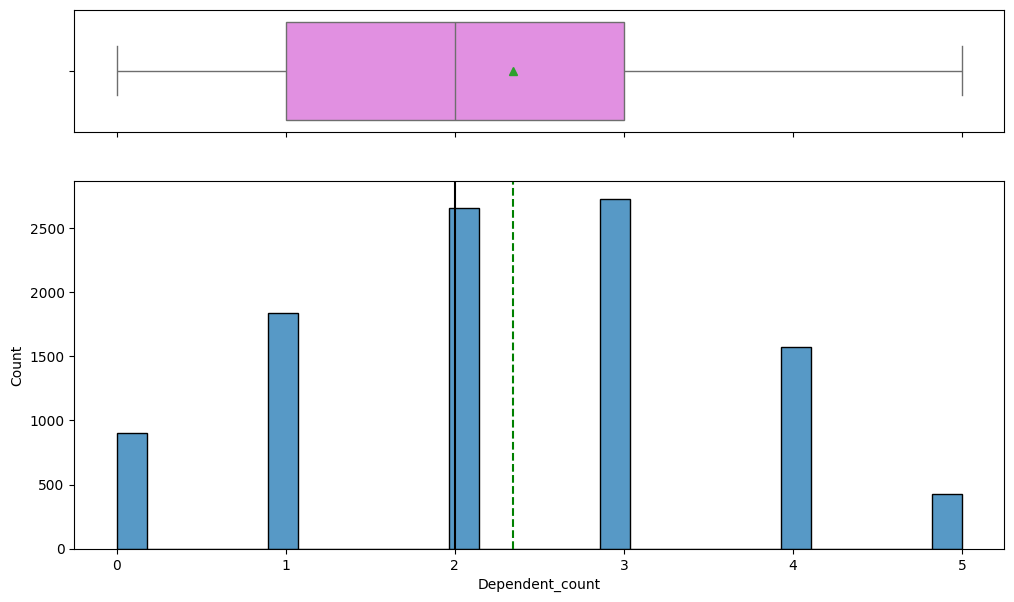

In [ ]:
histogram_boxplot(data, "Dependent_count")

* Most customers have two dependents
* The maximum number of dependents being five.

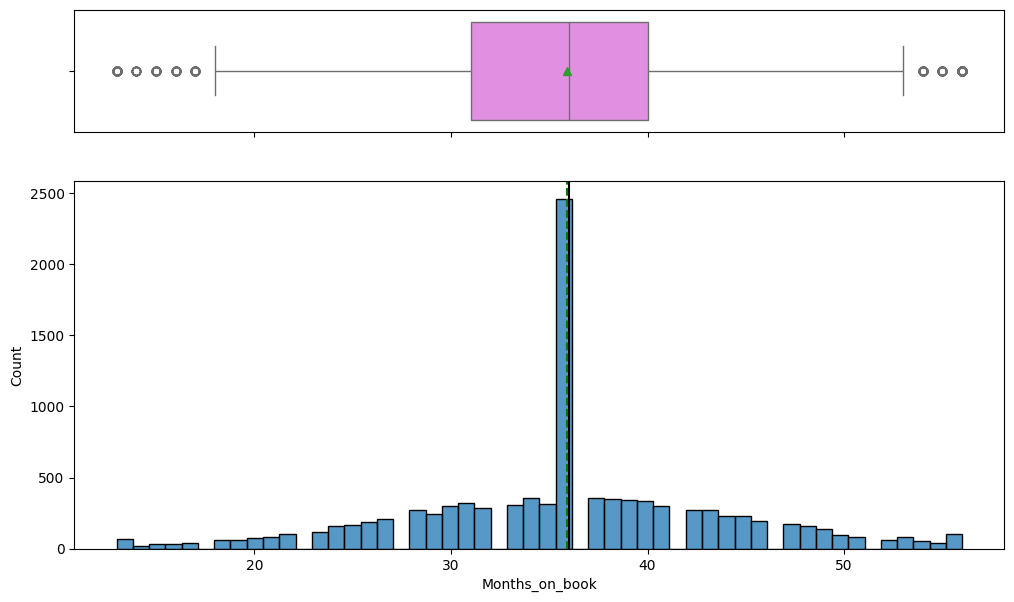

In [ ]:
histogram_boxplot(data, "Months_on_book")

* Most customers have a relationship with the bank of more than 35 months.
* The maximum duration of this relationship extends to 55 months.

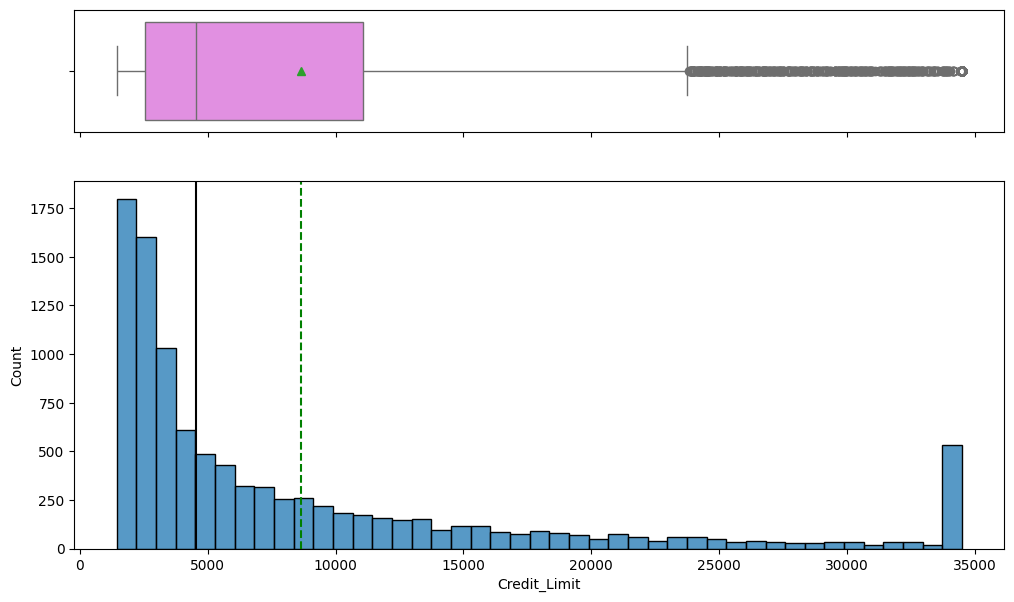

In [ ]:
histogram_boxplot(data, "Credit_Limit")

* The credit limit distribution is heavily skewed to the right.
* Numerous outliers are observed.
* The maximum credit limit extends to approximately $35,000.

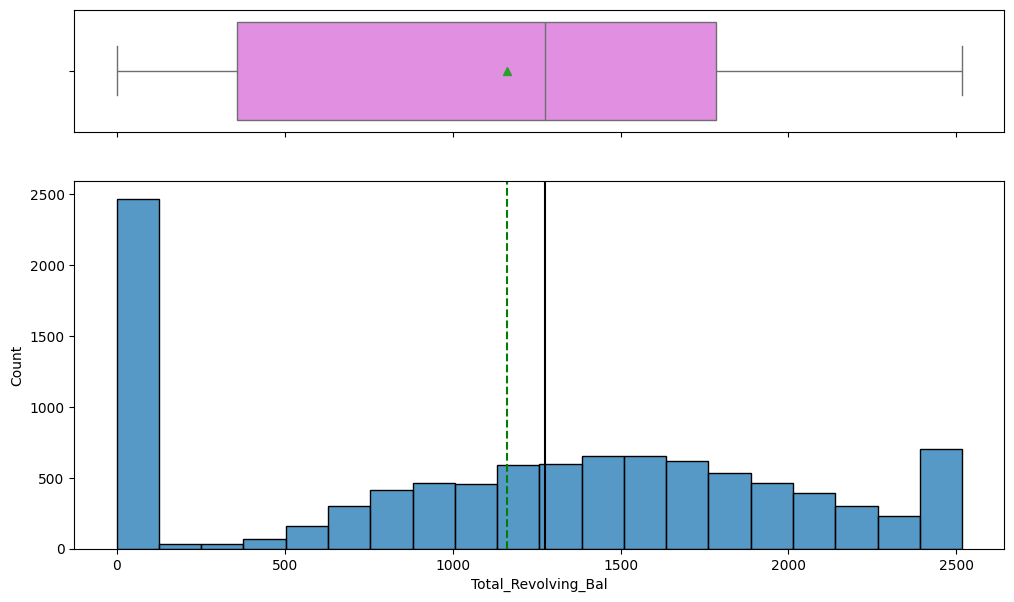

In [ ]:
histogram_boxplot(data, "Total_Revolving_Bal")

* The total revolving balance indicates a maximum debt of $2500.

* The median balance is approximately $1200.

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


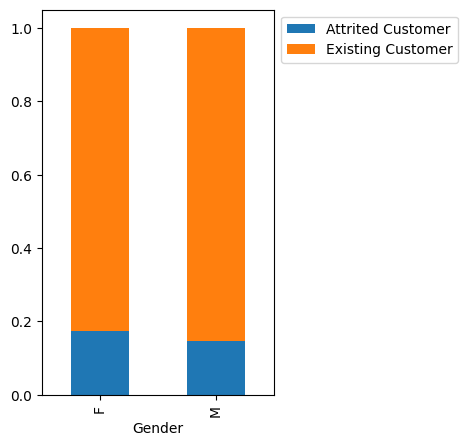

In [ ]:
stacked_barplot(data, "Gender", "Attrition_Flag")

* Around 20% of both male and female customers have closed their accounts, with males slightly fewer in number.

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


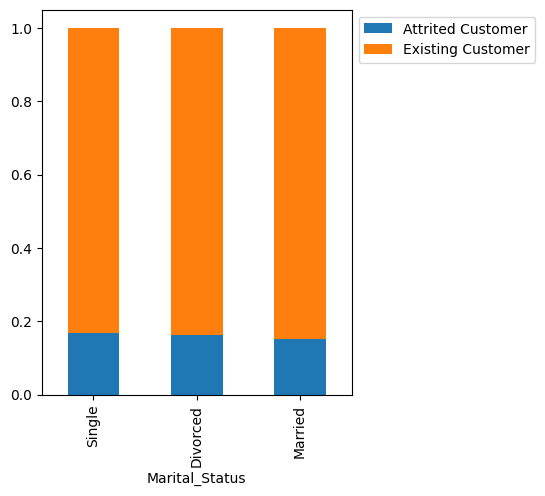

In [ ]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

* Approximately 20% of customers across various marital statuses have closed their accounts.

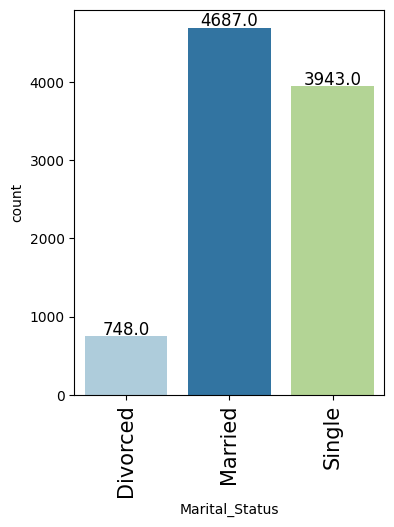

In [ ]:
labeled_barplot(data, "Marital_Status")

* Most of the customers are either married or single, with 748 customers who are divorced.

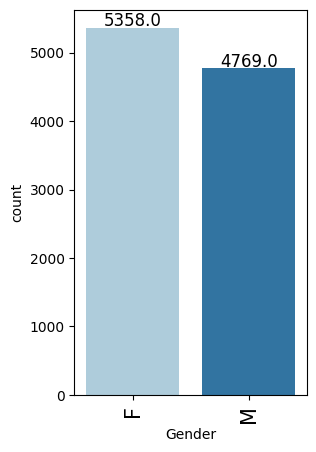

In [ ]:
labeled_barplot(data, "Gender")

* The number of female customers is 5358, while the number of male customers is 4769.

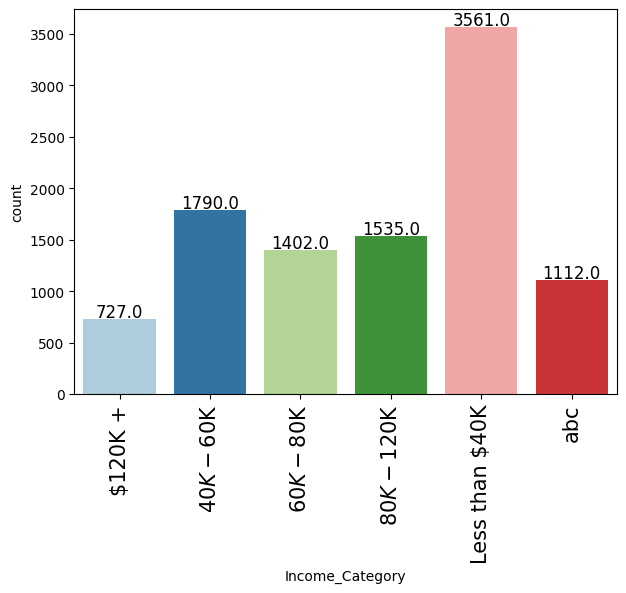

In [ ]:
labeled_barplot(data, "Income_Category")

* Most of the customers earn less than $ 40K per annum.

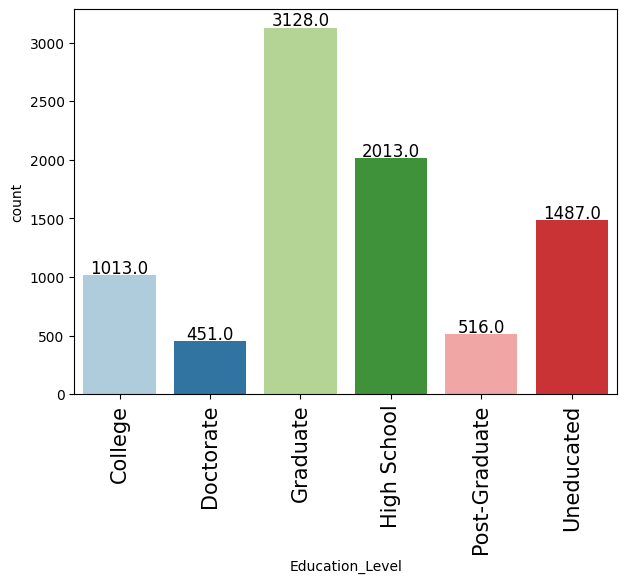

In [ ]:
labeled_barplot(data, "Education_Level")

* Most of the customers hole a Graduate degree.

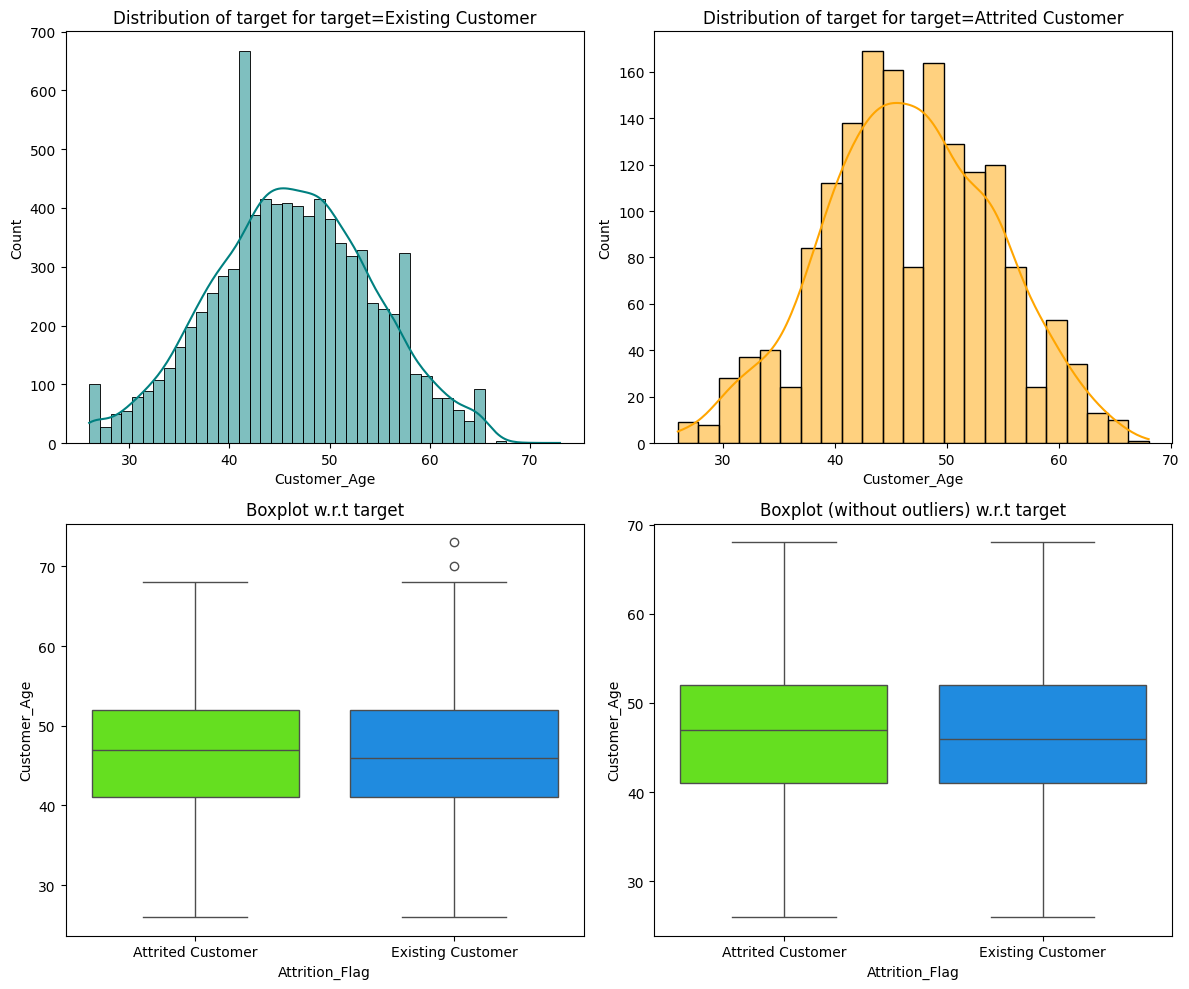

In [ ]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

* The plots indicate that age has no discernible effect on customers closing their accounts.

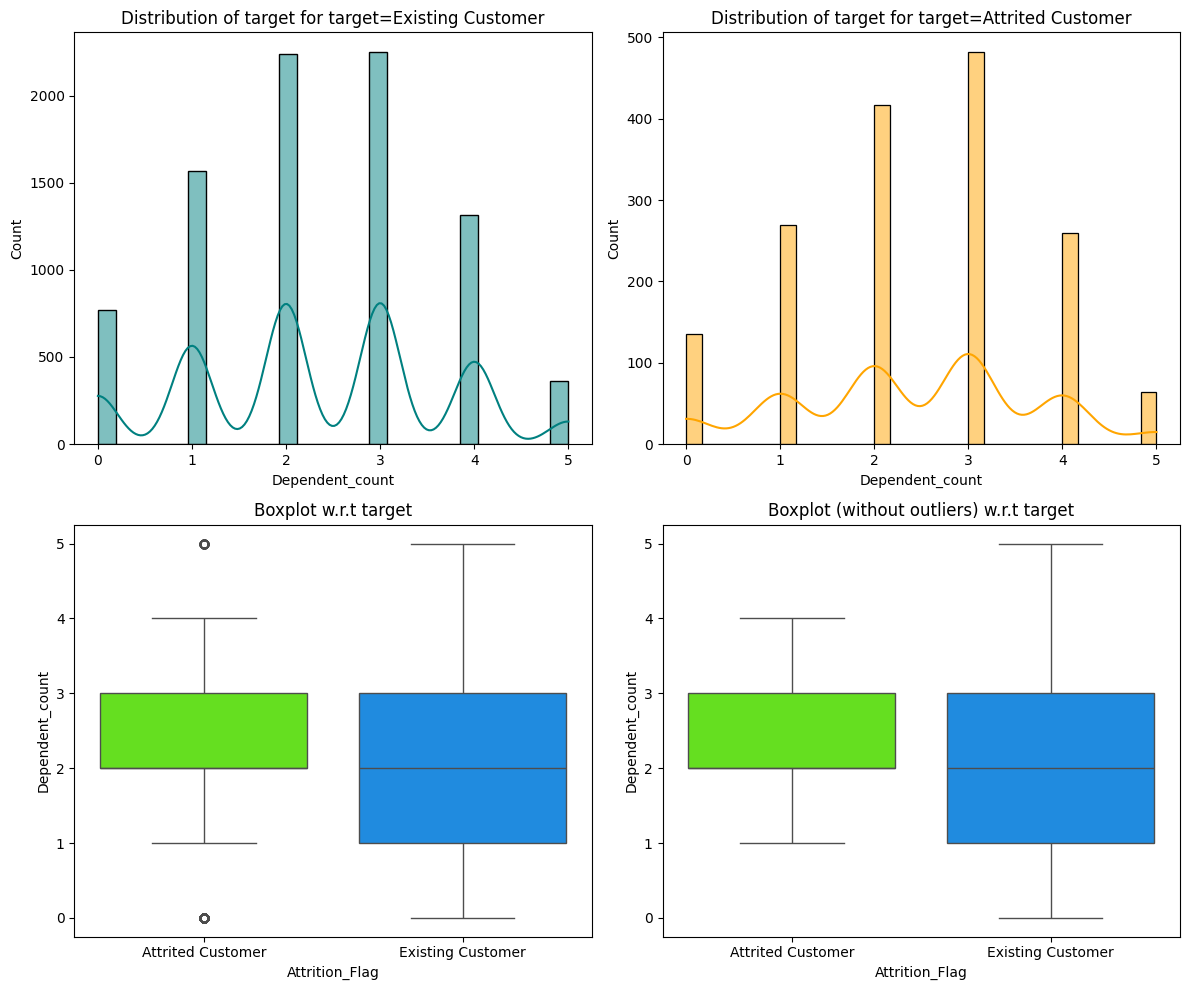

In [ ]:
distribution_plot_wrt_target(data, "Dependent_count", "Attrition_Flag")

* The number of dependents exhibits minimal to zero correlation with the target variable (attrited customers or existing customers).

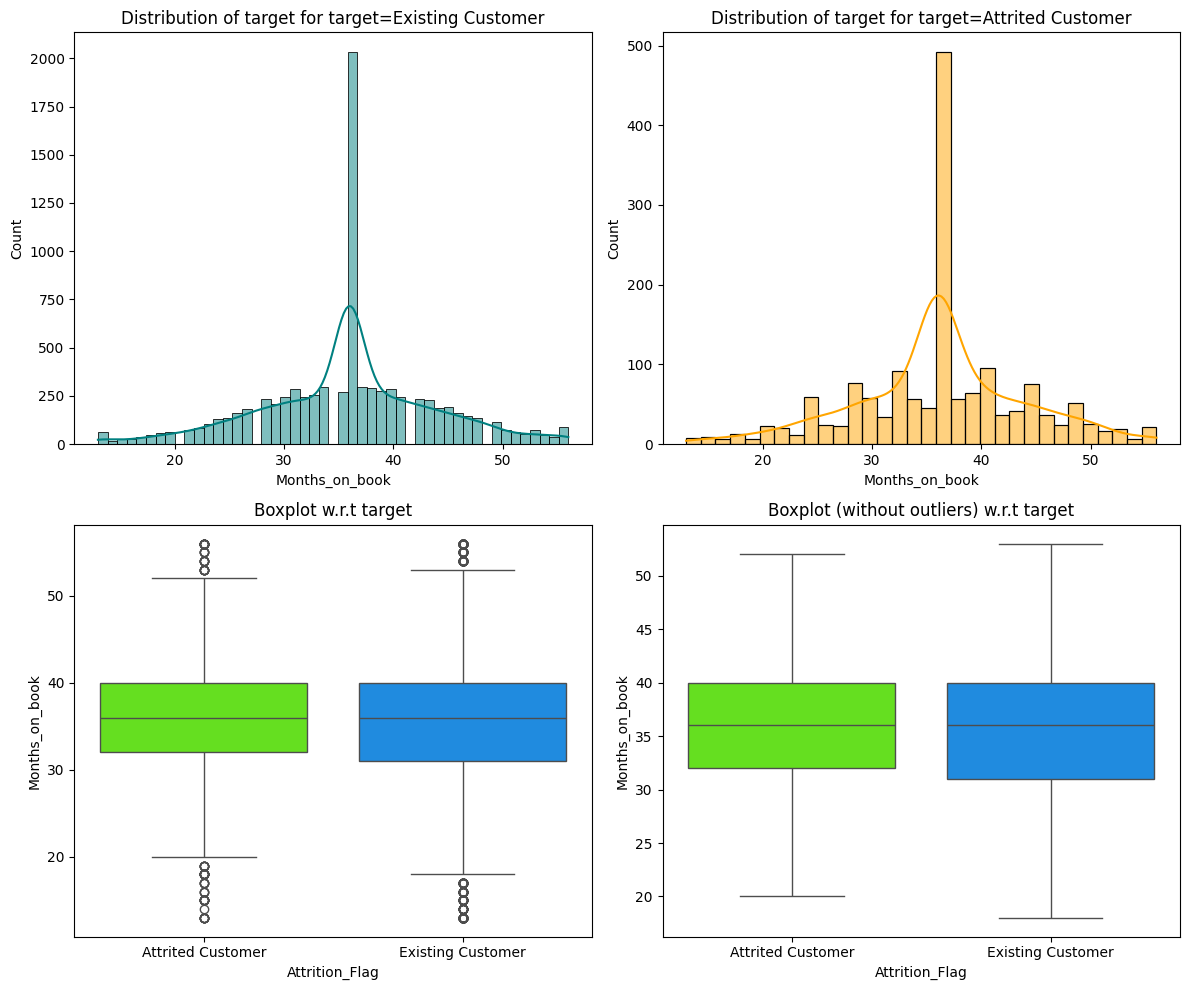

In [ ]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

* The period of the relationship with the bank (in months) exhibits no correlation with the target variable.

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


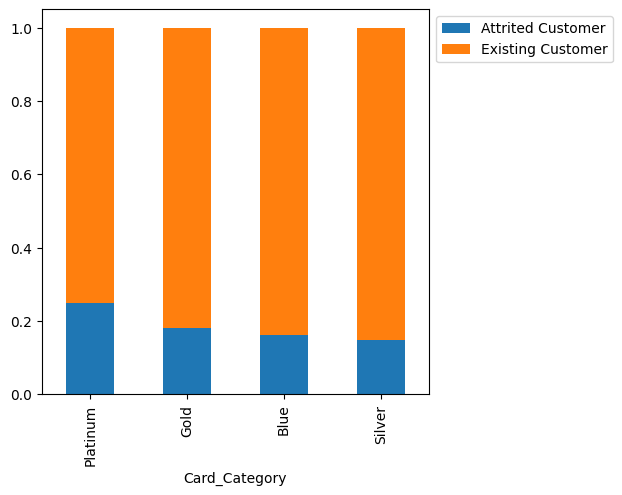

In [ ]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

* In descending order, customers with Blue card category closed their accounts more frequently than those with Silver, Gold, and finally Platinum cards.


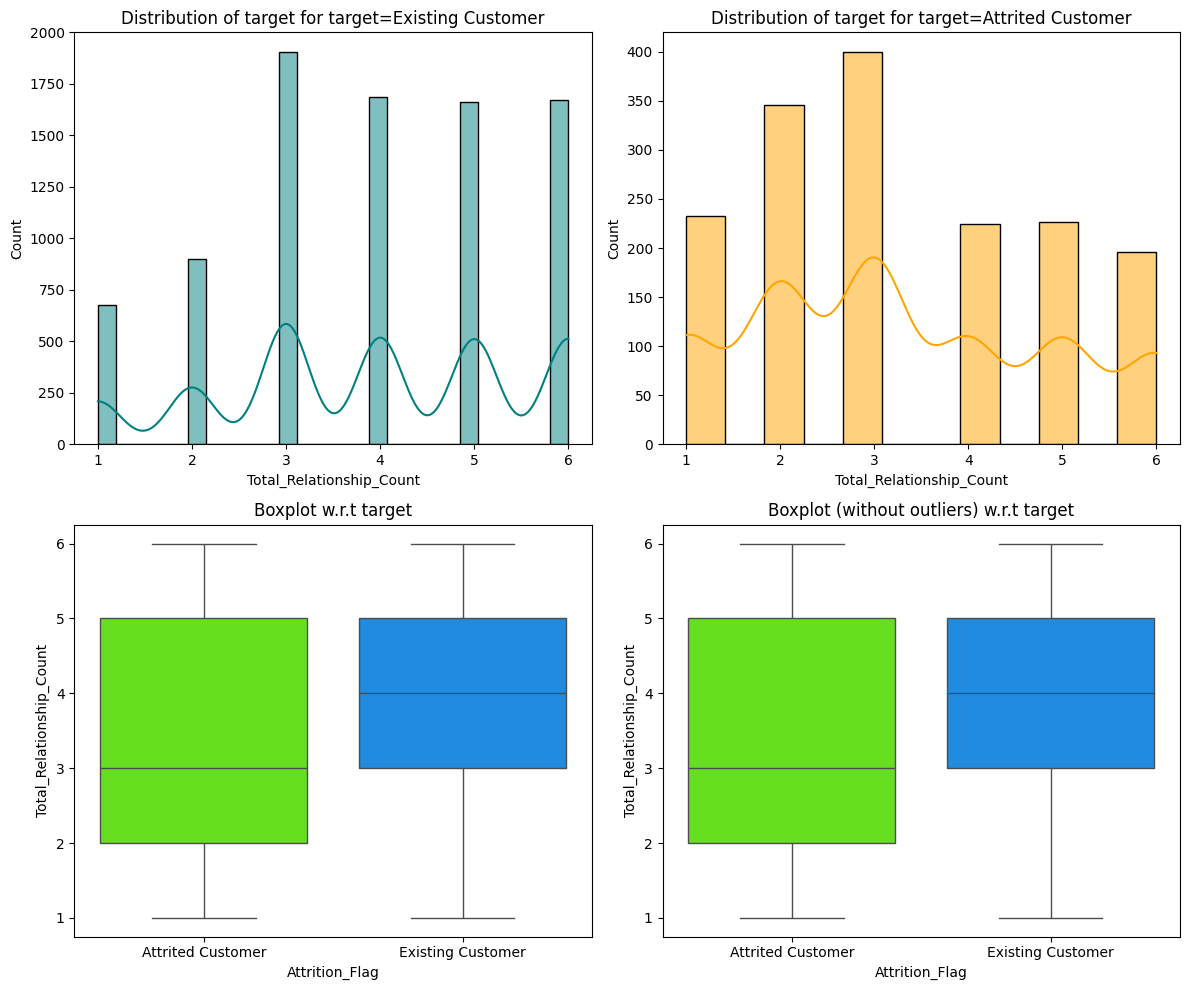

In [ ]:
distribution_plot_wrt_target(data, "Total_Relationship_Count", "Attrition_Flag")

* The total number of products held by customers is similar in both target categories, existing customers, and attrited customers, with a median of 4 for existing customers and 3 for attrited customers.

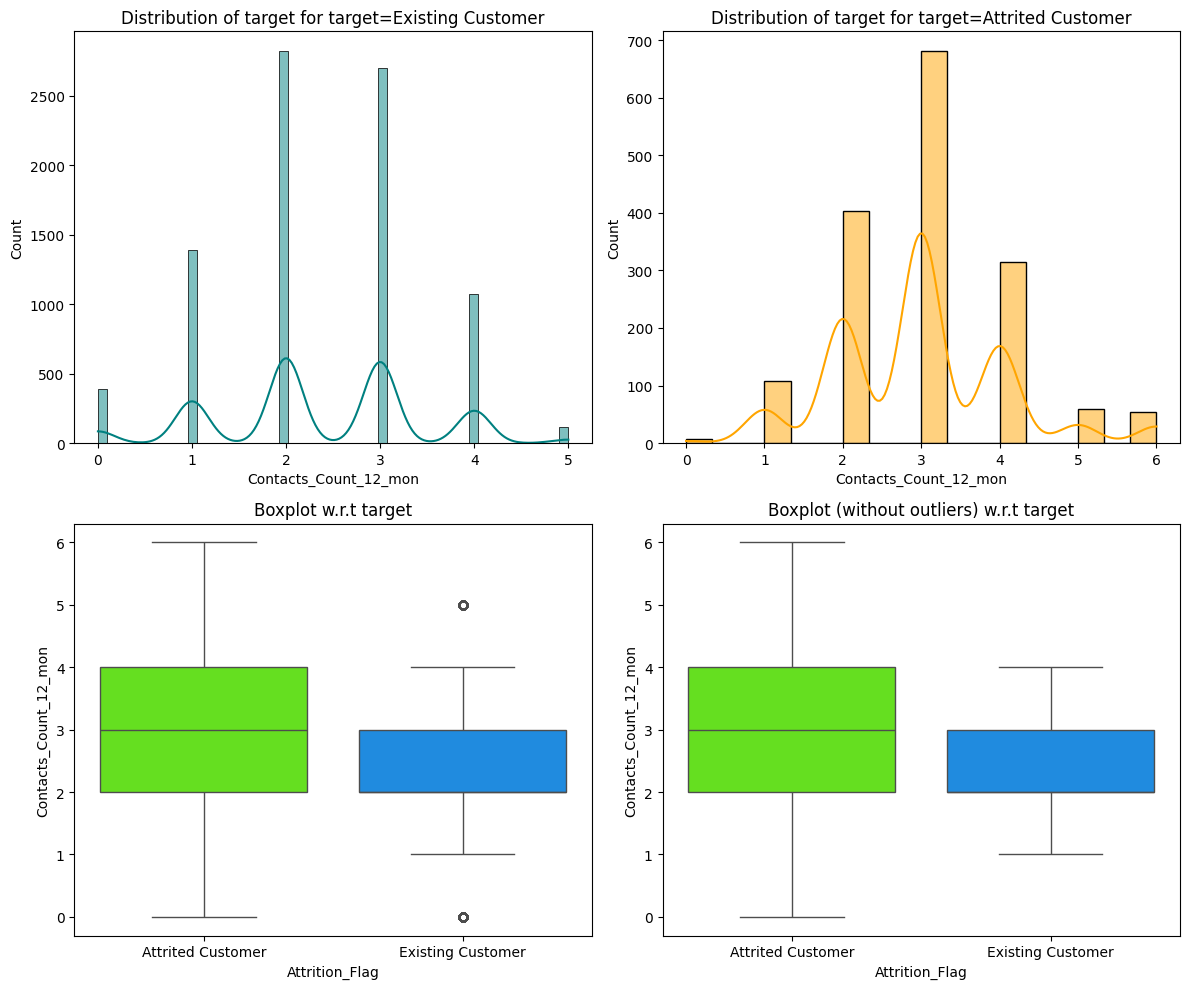

In [ ]:
distribution_plot_wrt_target(data, "Contacts_Count_12_mon", "Attrition_Flag")

* Attrited customers exhibit a higher number of contacts in the last 12 months compared to existing customers, reaching a maximum of 6 contacts.
* The median for attrited customers is 3 contacts.






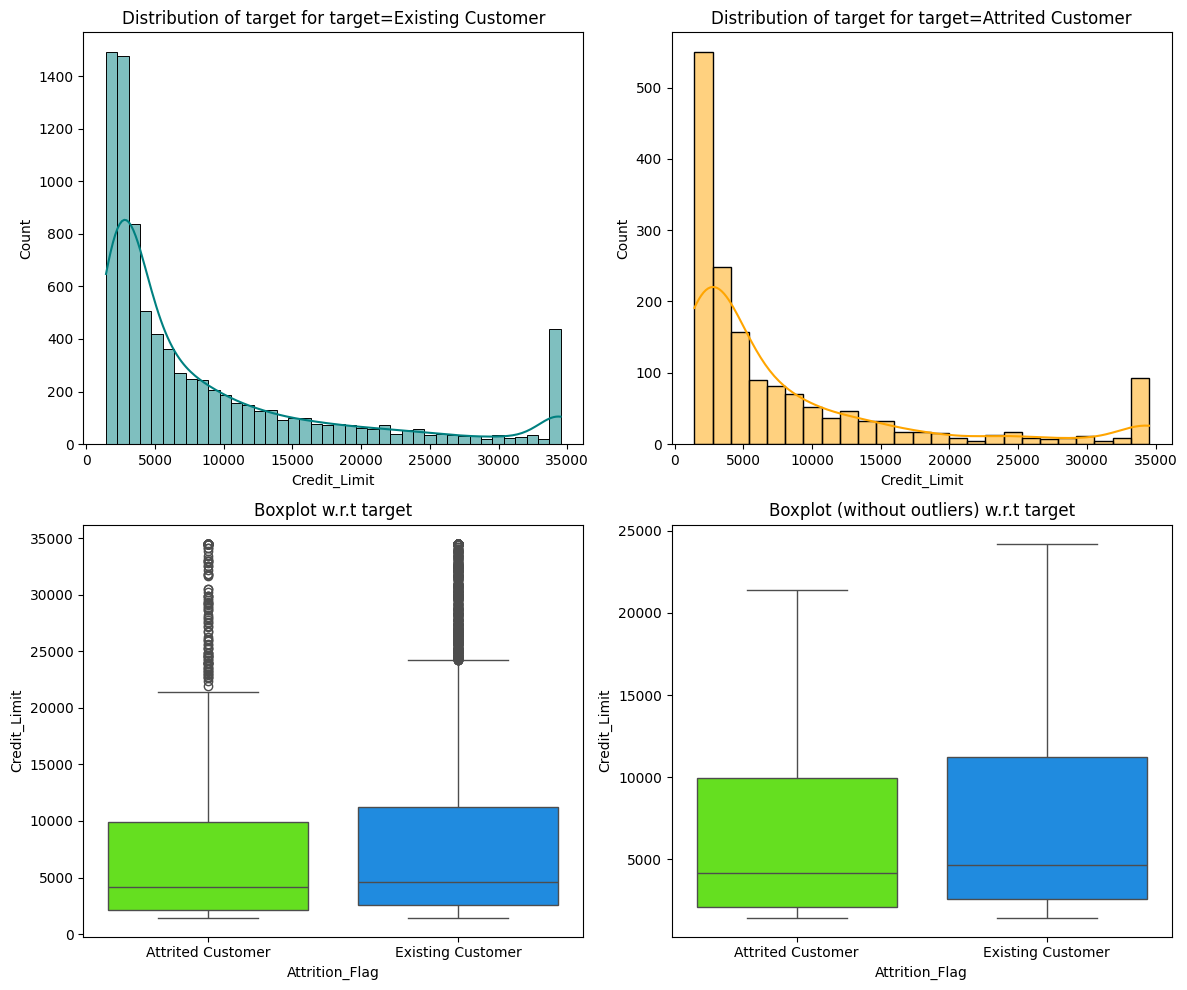

In [ ]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

* The credit limit extends just below $3500.

* There are numerous outliers in both target categories.
* In both target categories, the credit limit median is approximately $5000.

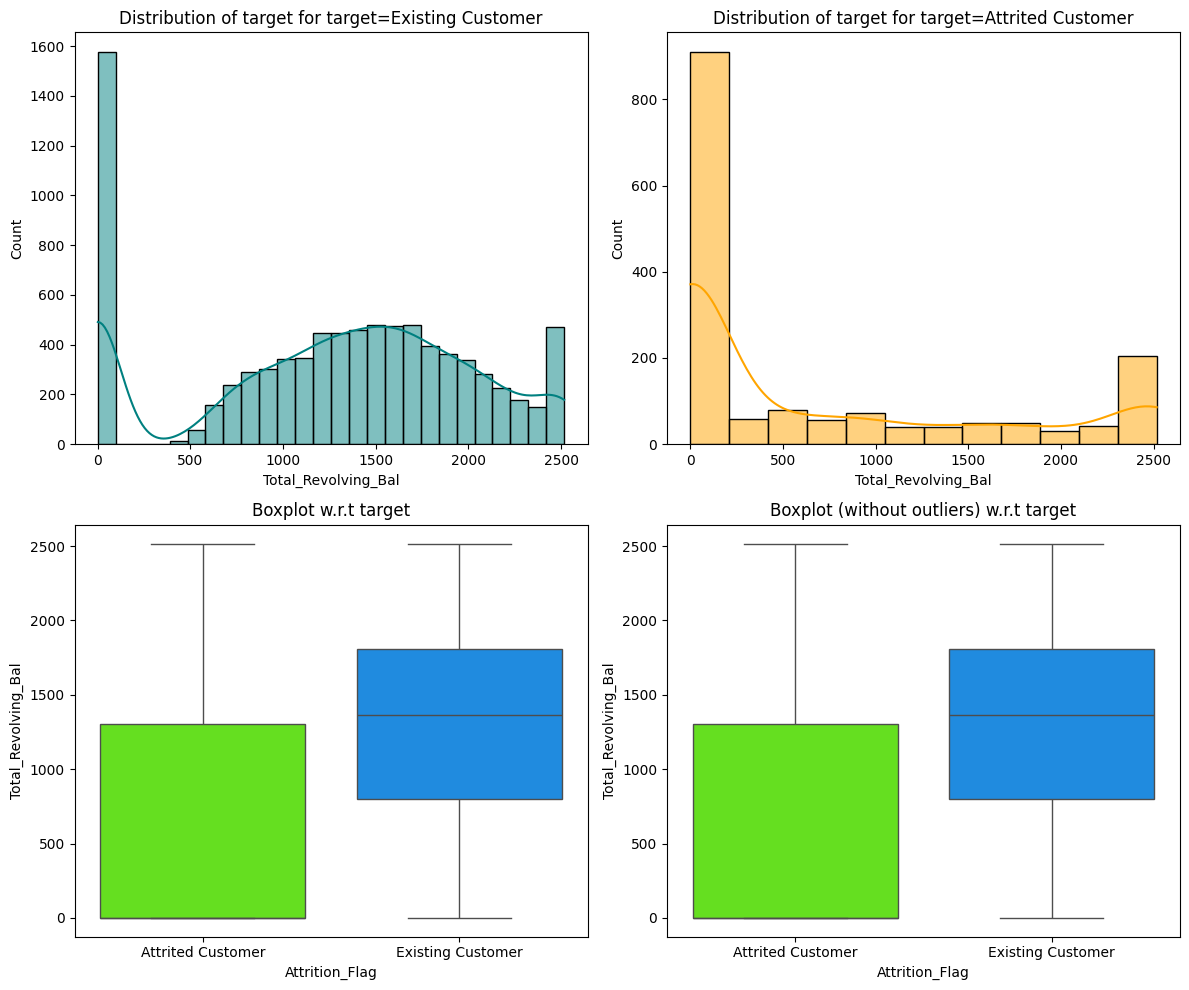

In [ ]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

* Existing customers exhibit a higher total Revolving Balance on the Credit Card compared to attrited customers.
* The maximum debt in both target categories extends to $2500.

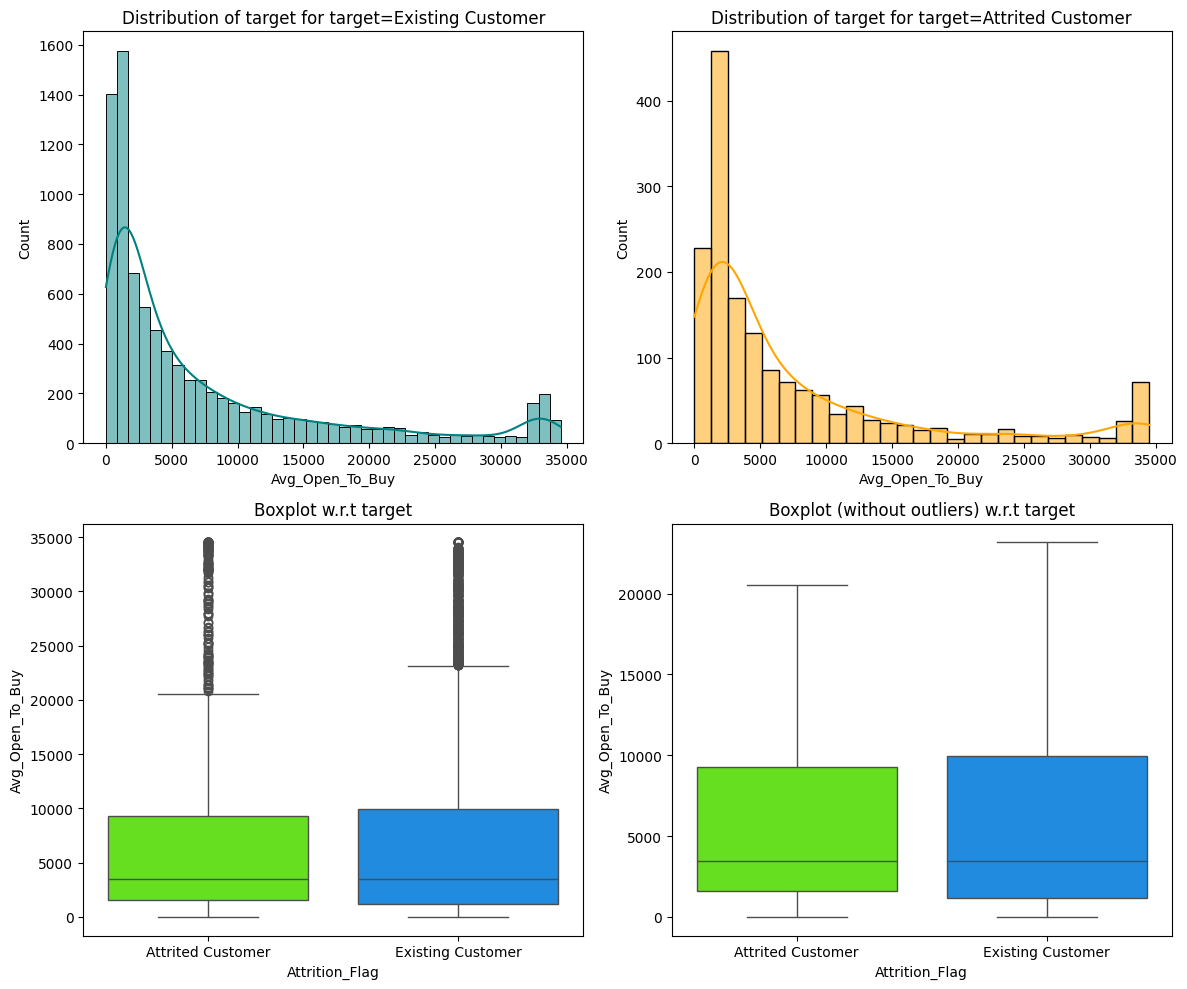

In [ ]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

* The Open-to-Buy Credit Line (Average of last 12 months) shows almost identical distribution in both target categories.

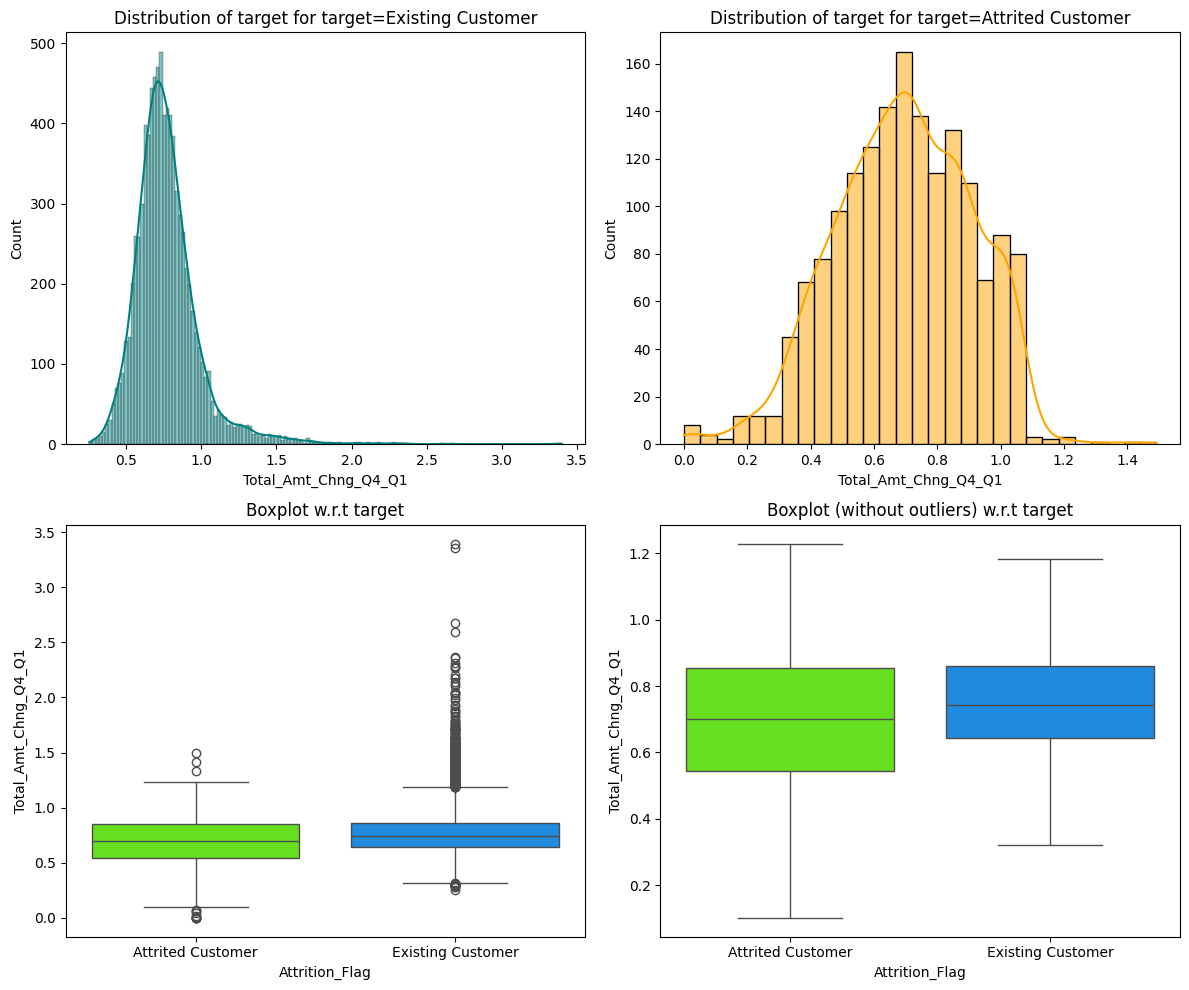

In [ ]:
distribution_plot_wrt_target(data, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

*  "Total_Amt_Chng_Q4_Q1" likely refers to the total change in the amount of transactions or spending from the fourth quarter (Q4) to the first quarter (Q1) within a given time period.A higher value indicates a significant increase in spending activity, while a lower value suggests less change or even a decrease in spending.
* Existing customers exhibit numerous outliers within their plot, indicating higher spending activity, and the median of existing customers is slightly higher.

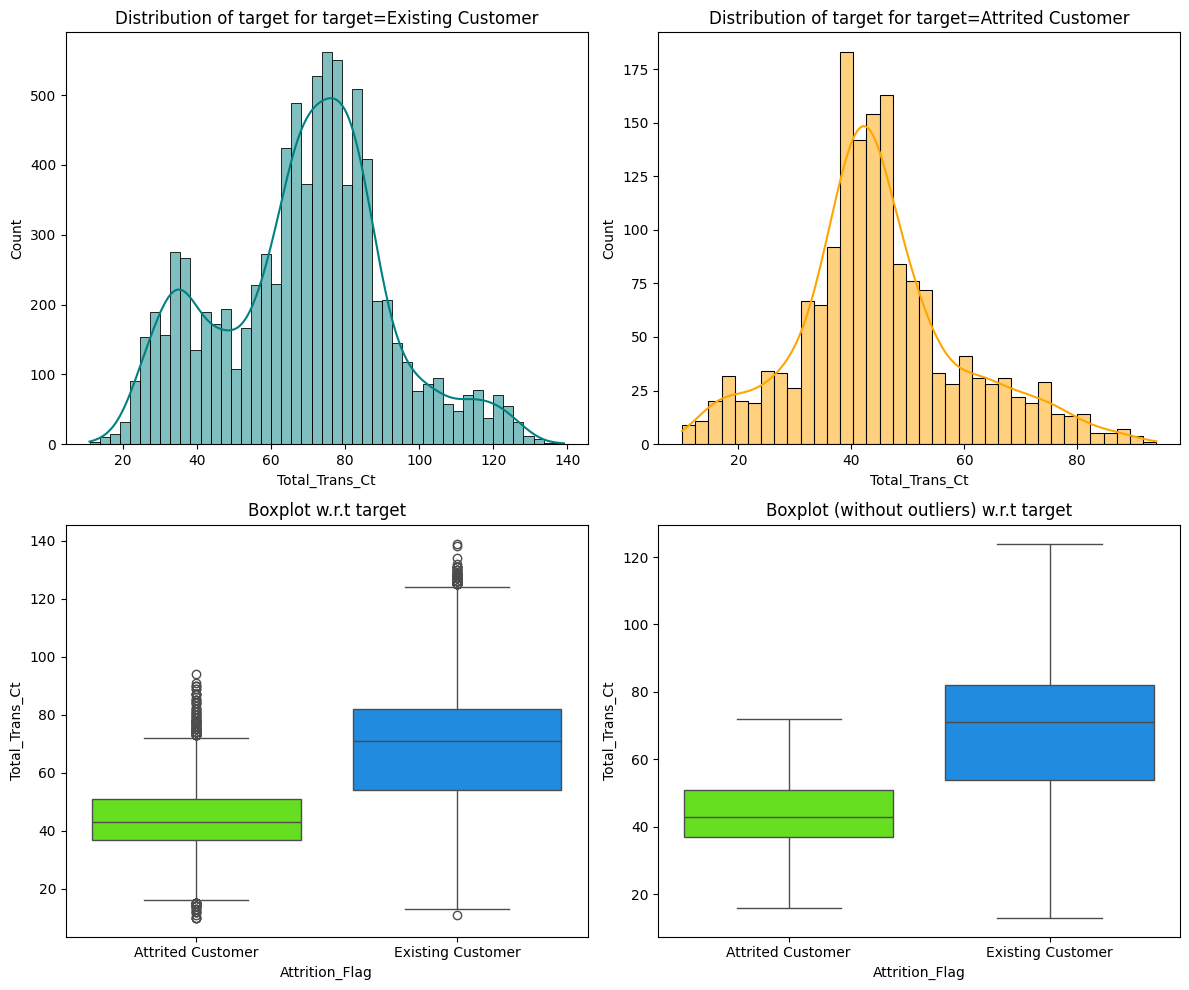

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

* Both target categories exhibit outliers in their number of transactions in the last 12 months.
* Existing customers almost show double the number of transactions compared to attrited customers.

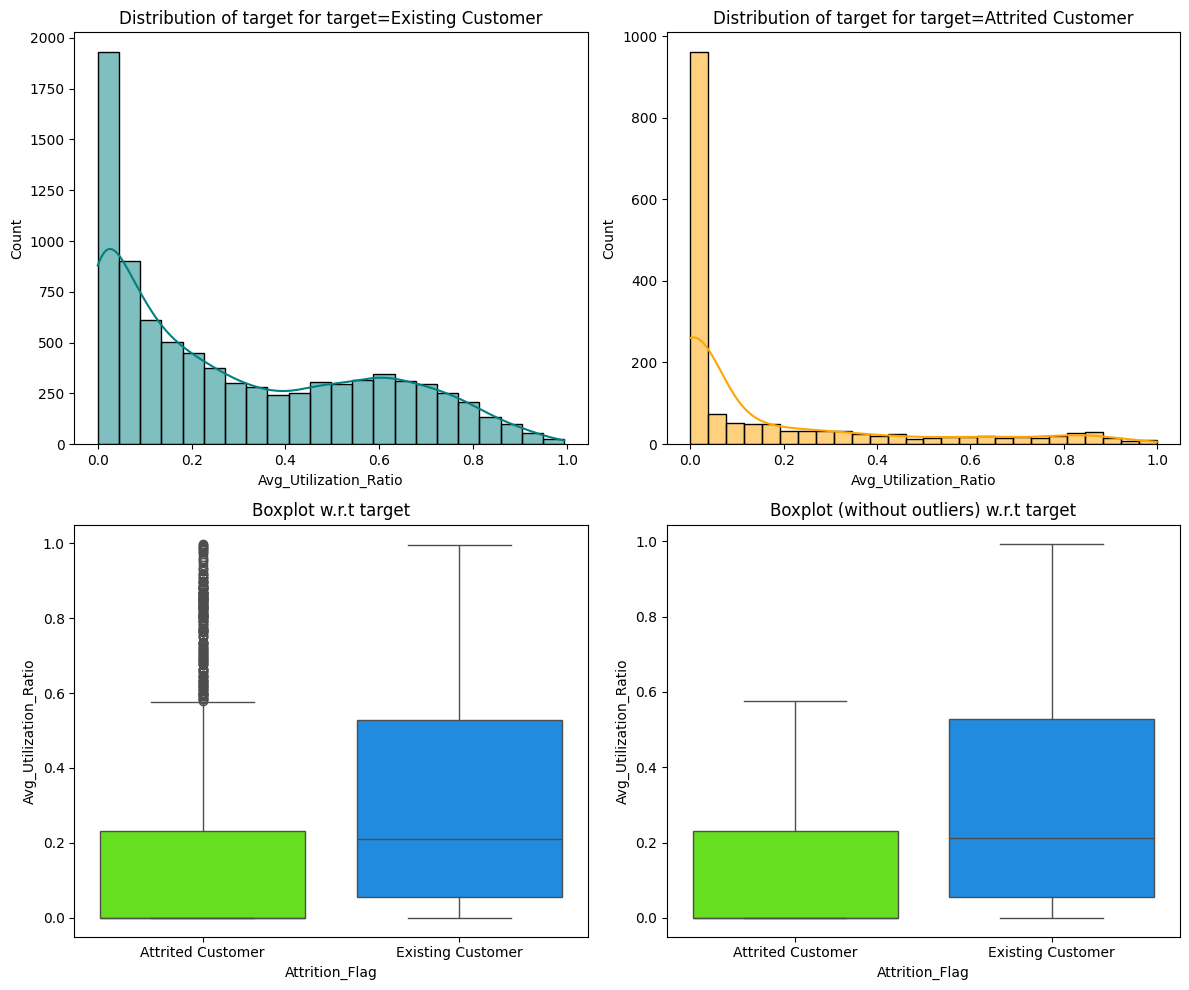

In [ ]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

* The "Avg_Utilization_Ratio" or Average Card Utilization Ratio refers to the average percentage of a credit card's available credit that a customer is currently using. A high utilization ratio indicates that a customer is using a large portion of their available credit.
* Attrited customers exhibit a significant number of outliers within their plot, potentially indicating unique or extreme circumstances.

***